In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import thermal_analysis as ta
import image_analysis as ia

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.max_open_warning'] = False

In [13]:
# def manual_crop(image)
#     """
    
#     """
#     %matplotlib qt
    
#     prompt = 'Select the new edges of the image. First, select the point indicating the height of the image.'+\
#     'Next, the width points. Right click done. Middle mouse button removes most recent point.'
#     message = "Press keyboard button to save points and exit."
#     print(prompt)
    
#     fig, ax = plt.subplots()
#     plt.setp(plt.gca(), autoscale_on=True)
#     ax.imshow(image)
   
#     image_corners = []
#     while True:
#         plt.title(prompt, wrap=True)
#         fig.canvas.draw()
#         while True:
#             points = plt.ginput(n=-1, show_clicks=True, timeout=-1,
#                                 mouse_add=1, mouse_stop=3, mouse_pop=2)
#             break
#         plt.title(message, wrap=True)
#         fig.canvas.draw()
#         print("Saved points = ", points)
#         print(message)
#         if plt.waitforbuttonpress():
#             for i in range(len(points)):
#                 point_col = int(np.round(points[i][0]))
#                 point_row = int(np.round(points[i][1]))
#                 image_corners.append([point_row, point_col])
#             plt.close()
# #             break 
    
#     %matplotlib inline
    
    
#     return sample_location


___
___

## Import video with samples

In [5]:
from unittest.mock import patch

In [21]:
@patch('numpy.array')
def test(x):
    x.return_value='maria was wrong'
    print(x.return_value)


In [22]:
test()

maria was wrong


In [3]:
test_image= ia.input_file('./data/images/24_conical_empty_plate.png')

In [4]:
np.shape(test_image)

(120, 160, 4)

In [7]:
flipped_image= ia.flip_frame(test_image)

In [18]:
test_image=test_image[12:105,17:147]

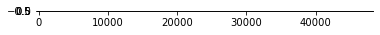

In [29]:
plt.imshow(test)

In [22]:
np.shape(crop_frame_48[0])

(94, 133)

In [33]:
np.shape(test_image)

(93, 130, 4)

In [30]:
test= np.reshape(test_image, (test_image.shape[0],test_image.shape[1]))

ValueError: cannot reshape array of size 48360 into shape (93,130)

In [34]:
93*130*4

48360

In [27]:
test

array([[ 42, 118, 142, ..., 227,  24, 255]], dtype=uint8)

In [14]:
sample = ia.edge_detection(test_image, 24)

ValueError: The parameter `image` must be a 2-dimensional array

In [20]:
# Inputting the video as a stack of arrays
frames_48 = ia.input_file('../../research/Data/20210217_Cand_Xyl_HP_150C_Wed_Feb_17_11-47-44_2021.HDF5')

# Cropping all the frames in the video

crop_frame_48 = []
for frame in frames_48:
    crop_frame_48.append(frame[18:112,10:143])
crop_frame_48 = ia.flip_frame(crop_frame_48)

(94, 133)

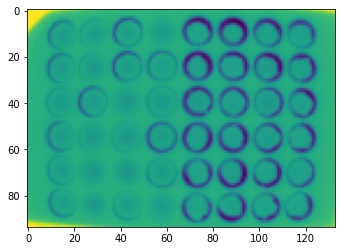

In [6]:
plt.imshow(crop_frame_48[-1])

In [7]:
import ipywidgets as widgets

In [14]:
x= widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
x

IntRangeSlider(value=(5, 7), continuous_update=False, description='Test:', max=10)

In [15]:
x.__dict__

{'_trait_values': {'min': 0,
  'max': 10,
  'step': 1,
  'description': 'Test:',
  'disabled': False,
  'continuous_update': False,
  'orientation': 'horizontal',
  'readout': True,
  'readout_format': 'd',
  'value': (5, 7),
  'comm': <ipykernel.comm.comm.Comm at 0x1db33818e08>,
  'keys': ['_dom_classes',
   '_model_module',
   '_model_module_version',
   '_model_name',
   '_view_count',
   '_view_module',
   '_view_module_version',
   '_view_name',
   'continuous_update',
   'description',
   'description_tooltip',
   'disabled',
   'layout',
   'max',
   'min',
   'orientation',
   'readout',
   'readout_format',
   'step',
   'style',
   'value'],
  '_dom_classes': (),
  '_model_module': '@jupyter-widgets/controls',
  '_model_module_version': '1.5.0',
  '_model_name': 'IntRangeSliderModel',
  '_view_count': None,
  '_view_module': '@jupyter-widgets/controls',
  '_view_module_version': '1.5.0',
  '_view_name': 'IntRangeSliderView',
  'description_tooltip': None,
  'layout': Layout()

In [18]:
height = widgets.IntRangeSlider(description='height')
width = widgets.IntSlider(description='width')

def crop_image(image, height, width):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

### Find centroid using manual selection

In [7]:
% matplotlib qt

In [8]:
points = ia.manual_centroid(crop_frame_48[-1])

Remember to run the following command:  % matplotlib qt 
This way you are enabling the pop-up option for images
Select the centroid of each well. Right click oncedone. Middle mouse button removes most recent point.
Press keyboard button to save points and exit.
Now run the following command:  % matplotlib inline 
to reset the image visualization as inline in JN


In [9]:
% matplotlib inline

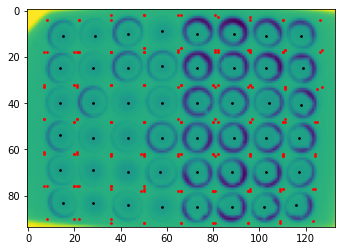

In [11]:
plate_loc_48 = ia.plate_location(points, 8,6)
plt.imshow(crop_frame_48[-1])
plt.scatter(points['Column'],points['Row'], c='k', s=3)
plt.scatter(plate_loc_48['Plate_col'],plate_loc_48['Plate_row'], c='r', s=3)

In [12]:
sample_temp_48, plate_temp_48 = ta.pixel_intensity(points,plate_loc_48, crop_frame_48, r=2)

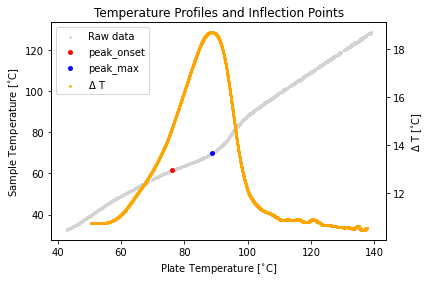

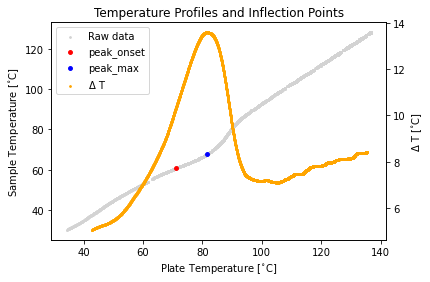

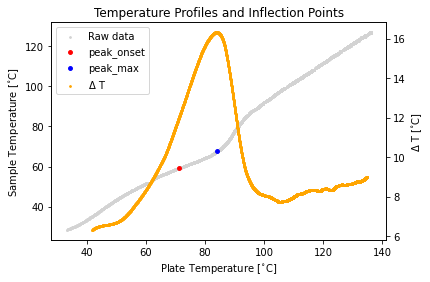

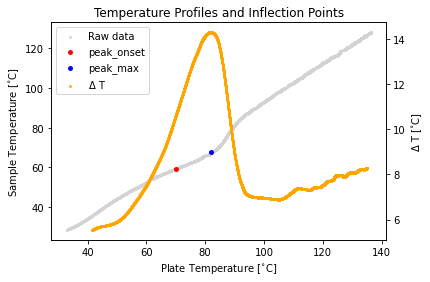

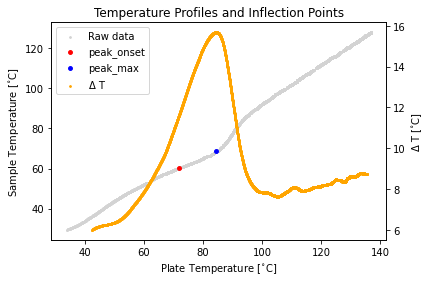

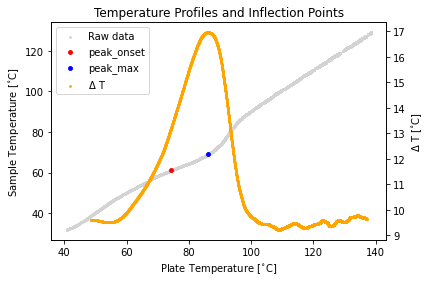

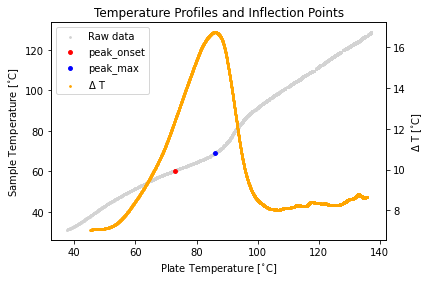

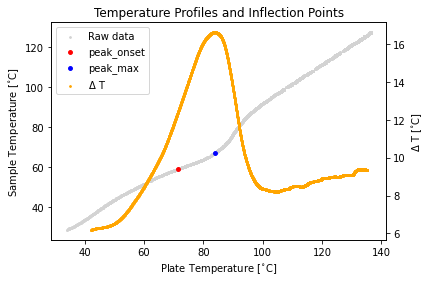

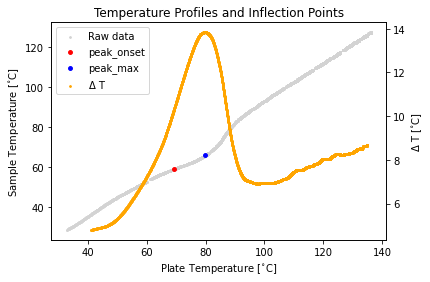

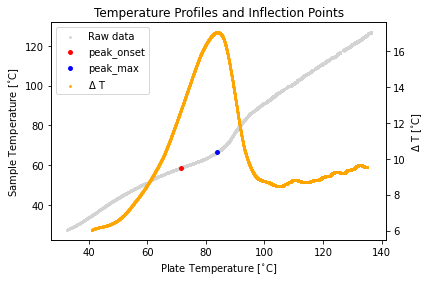

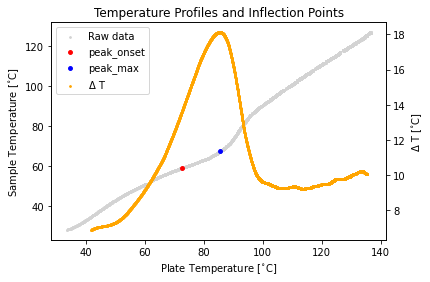

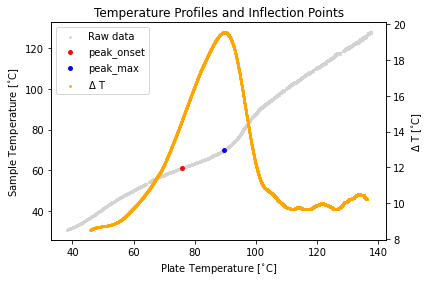

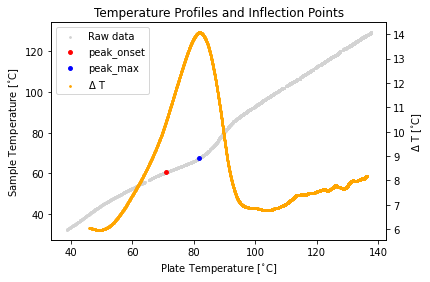

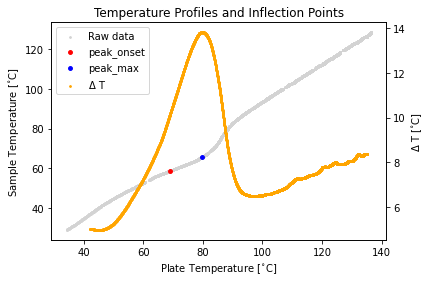

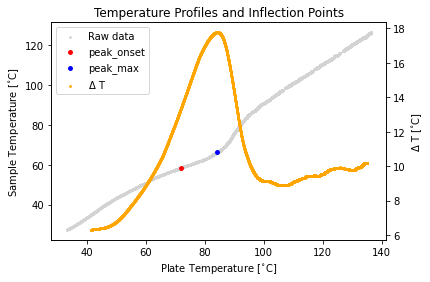

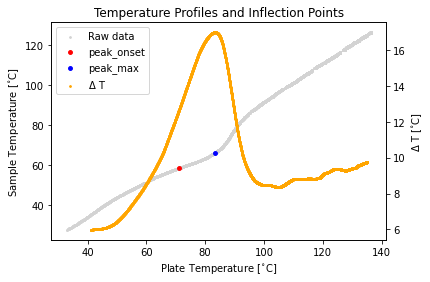

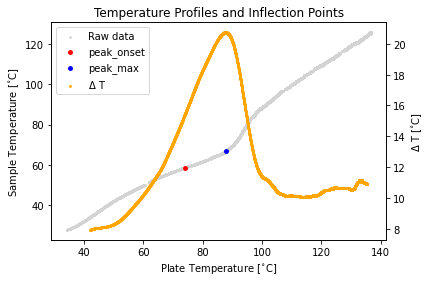

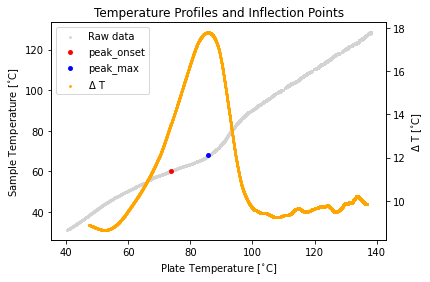

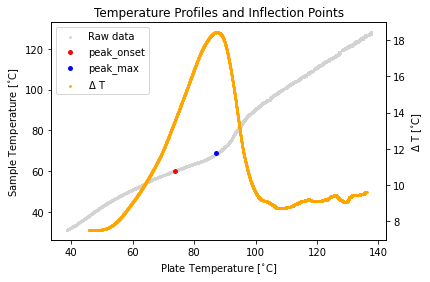

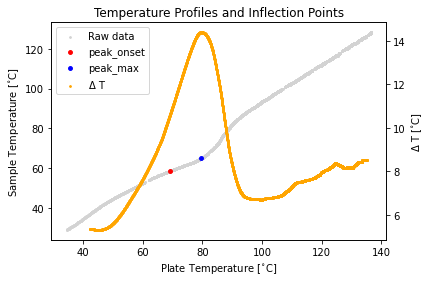

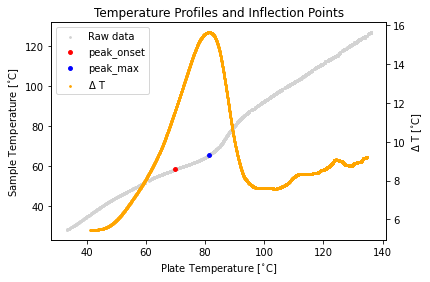

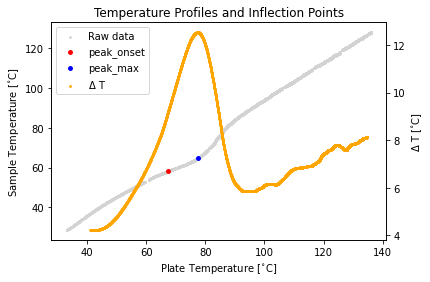

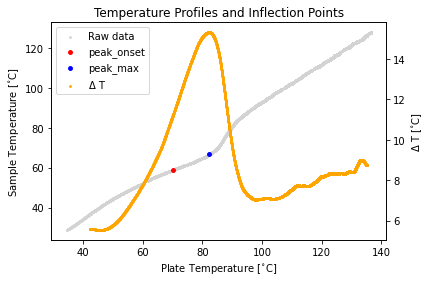

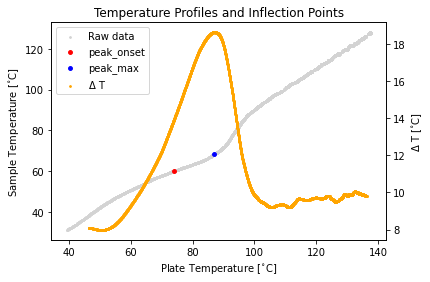

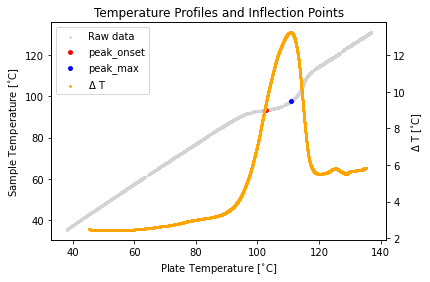

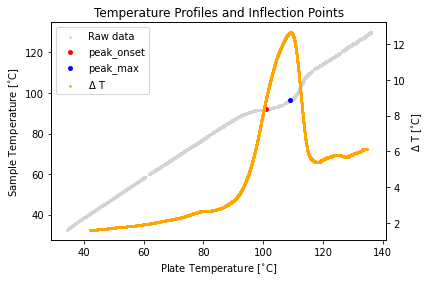

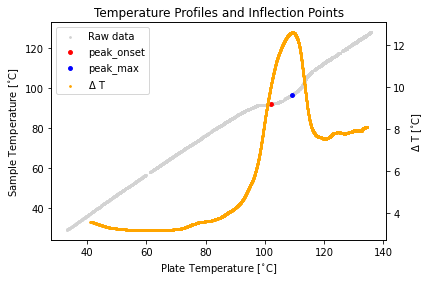

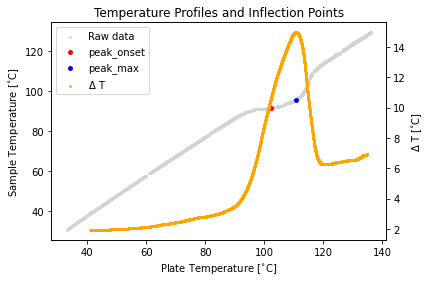

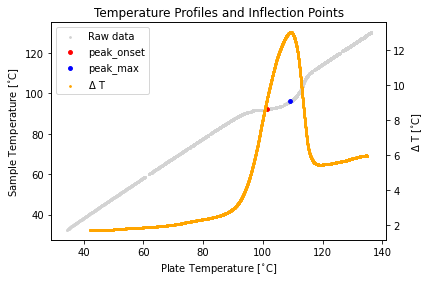

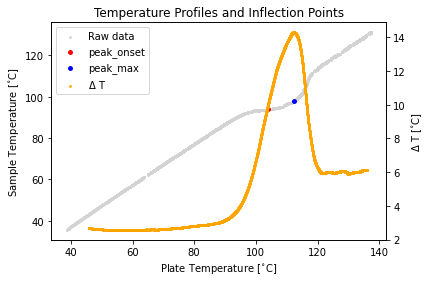

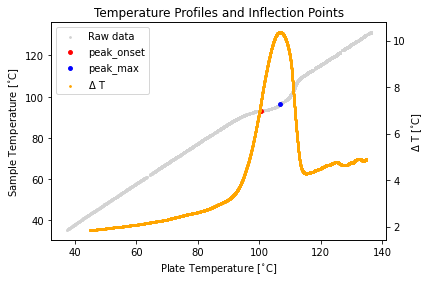

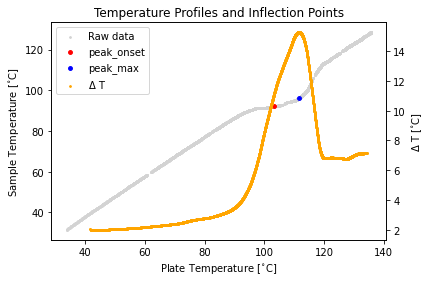

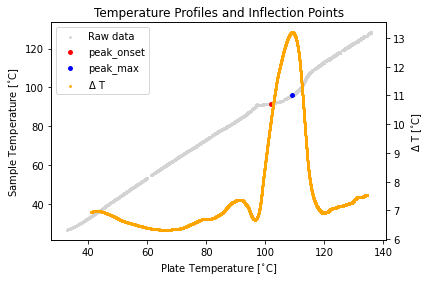

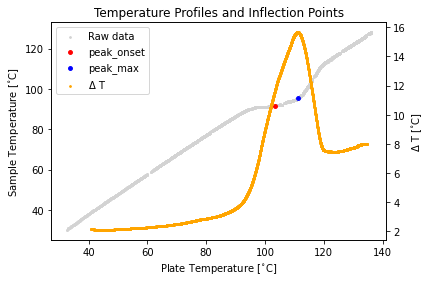

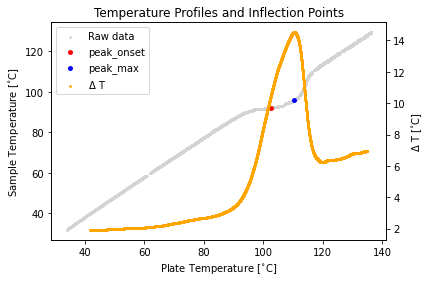

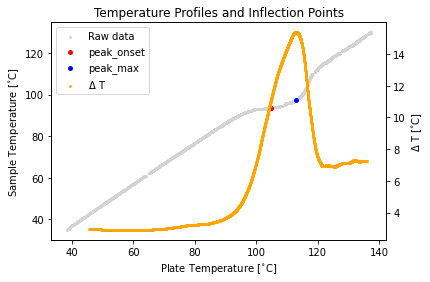

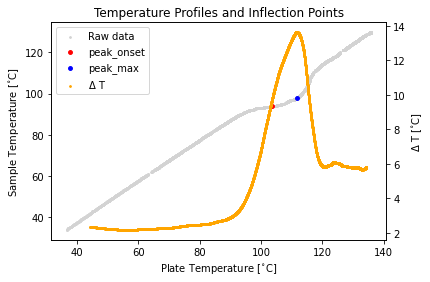

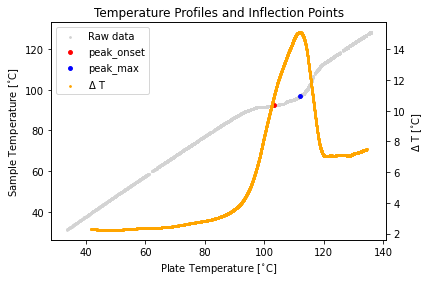

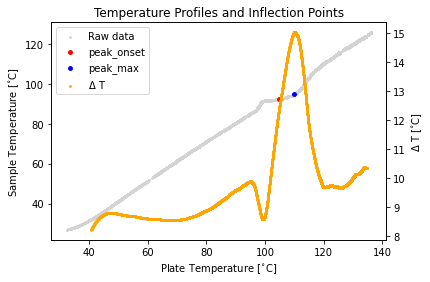

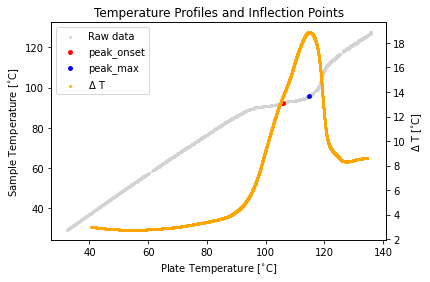

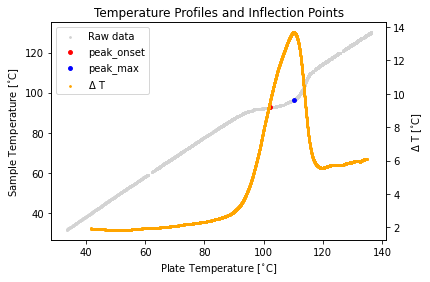

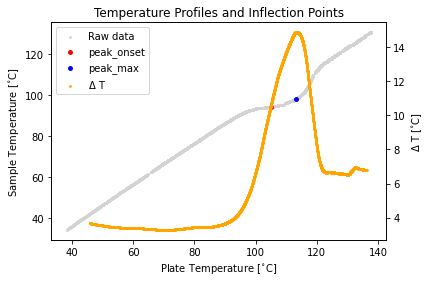

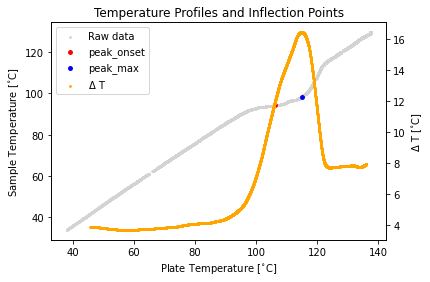

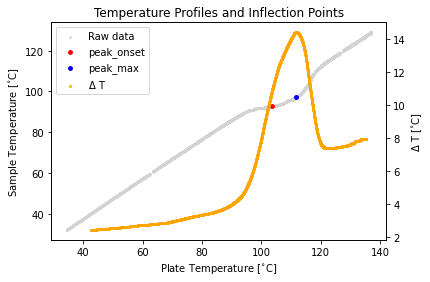

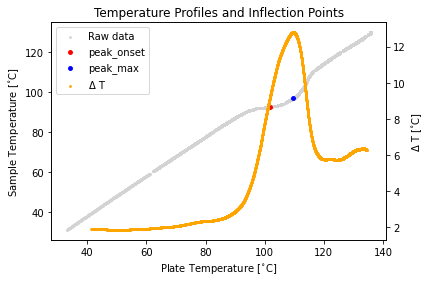

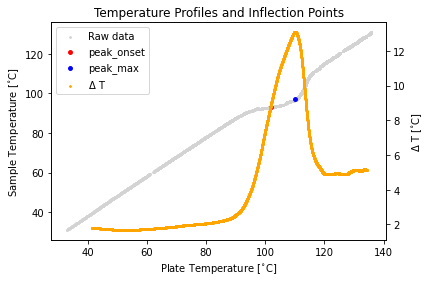

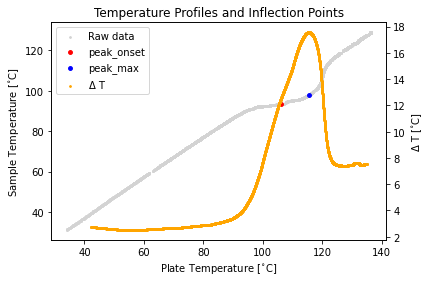

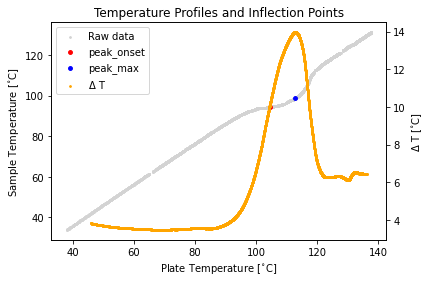

In [13]:
temp_df = ta.phase_transition_temperature(plate_temp_48, sample_temp_48,plot=True)

In [16]:
temp_df

Sample_temp_onset  Sample_temp_peak  Plate_temp_onset  Plate_temp_peak
0               61.43             69.94             76.16            88.65
1               60.76             67.92             71.10            81.50
2               59.19             67.62             71.21            83.94
3               59.36             67.59             69.94            81.88
4               60.26             68.78             71.91            84.47
5               61.16             69.10             74.40            86.07
6               60.46             69.26             72.84            86.01
7               59.02             67.12             71.43            83.74
8               59.00             65.86             69.37            79.70
9               58.86             66.87             71.61            83.91
10              59.06             67.28             72.72            85.40
11              61.15             70.08             75.76            89.62
12              60.56             67.75             70.98            81.83
13              58.79             65.94             68.94            79.75
14              58.47             66.31             71.80            84.09
15              58.43             66.22             71.10            83.22
16              58.52             67.01             73.92            87.77
17              60.16             67.97             73.69            85.78
18              60.25             68.80             73.82            87.23
19              58.50             65.35             69.04            79.74
20              58.27             65.65             69.89            81.29
21              58.21             64.94             67.40            77.48
22              58.80             66.79             69.97            82.11
23              60.03             68.44             73.95            87.07
24              93.38             97.57            102.76           110.83
25              92.02             96.47            101.05           109.11
26              91.95             96.63            102.03           109.25
27              91.62             95.61            102.22           110.57
28              92.18             96.22            101.41           109.26
29              93.95             97.96            104.05           112.26
30              93.17             96.29            100.49           106.66
31              92.05             96.16            103.09           111.44
32              91.75             95.89            101.80           109.09
33              91.69             95.47            103.25           111.13
34              92.09             95.93            102.48           110.45
35              93.70             97.58            104.84           112.96
36              93.81             98.03            103.46           111.67
37              92.35             96.88            103.42           111.99
38              92.37             95.00            104.71           110.04
39              92.22             95.91            105.81           114.79
40              92.61             96.49            102.24           110.18
41              94.41             98.42            105.11           113.30
42              94.23             98.46            106.29           114.89
43              92.73             97.39            103.62           111.81
44              92.60             96.86            101.86           109.66
45              93.01             96.97            101.99           110.05
46              93.58             97.86            106.07           115.44
47              94.33             98.82            104.37           112.78

In [19]:
print('Candelilla wax\n')
Candelilla_sample_temp = np.average(temp_df['Sample_temp_onset'].loc[:23])
C_sample_temp_std = np.std(temp_df['Sample_temp_onset'].loc[:23])
print('Onset Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Candelilla_sample_temp,C_sample_temp_std, '68'))

Candelilla_sample_temp = np.average(temp_df['Sample_temp_peak'].loc[:24])
C_sample_temp_std = np.std(temp_df['Sample_temp_peak'].loc[:24])
print('\nPeak Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Candelilla_sample_temp,C_sample_temp_std,'68'))

Candelilla wax

Onset Melting temperature from: 
Sample: 59.53 ± 1.00 
Literature: 68

Peak Melting temperature from: 
Sample: 68.65 ± 6.06 
Literature: 68


In [26]:
print('Xylitol wax\n')
Xylitol_sample_temp = np.average(temp_df['Sample_temp_onset'].loc[24:])
X_sample_temp_std = np.std(temp_df['Sample_temp_onset'].loc[24:])
print('Onset Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Xylitol_sample_temp,X_sample_temp_std, '68'))

Xylitol_sample_temp = np.average(temp_df['Sample_temp_peak'].loc[24:])
X_sample_temp_std = np.std(temp_df['Sample_temp_peak'].loc[24:])
print('\nPeak Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Xylitol_sample_temp,X_sample_temp_std,'68'))

Xylitol wax

Onset Melting temperature from: 
Sample: 92.83 ± 0.88 
Literature: 68

Peak Melting temperature from: 
Sample: 96.87 ± 1.02 
Literature: 68


___
___

# Try and find the melting temp

### Smooth the data and perform linear fit

In [34]:
def baseline_method(plate_temp, sample_temp, option=None):
    test_df = pd.DataFrame({'Frames':np.linspace(1,len( plate_temp), len( plate_temp)),
                        'Plate_temp': plate_temp, 'Sample_temp':  sample_temp})
    n= int(0.05*len(test_df['Plate_temp']))
    test_df['Plate_avg']=test_df.iloc[:,1].rolling(window=n).mean()
    test_df['Sample_avg']=test_df.iloc[:,2].rolling(window=n).mean()
    removed_baseline = test_df['Plate_avg']-test_df['Sample_avg']
    if option:
        fig, ax = plt.subplots() 
        ax.semilogx(test_df['Frames'],test_df['Plate_avg'], c='red', label='Plate Temp')
        ax.semilogx(test_df['Frames'],test_df['Sample_avg'], c='blue', label='Sample Temp')
        ax1=ax.twinx()
        ax1.semilogx(test_df['Frames'], removed_baseline, c='orange', label='Removed Baseline')
        ax.set_xlabel('Frames')
        ax.set_ylabel(' Temperature ')
        ax.legend()
    else:
        fig, ax = plt.subplots() 
        ax.scatter(test_df['Frames'],test_df['Plate_avg'], c='red', label='Plate Temp', s=3)
        ax.scatter(test_df['Frames'],test_df['Sample_avg'], c='blue', label='Sample Temp', s=3)
        ax1=ax.twinx()
        ax1.scatter(test_df['Frames'], removed_baseline, c='orange', label='Removed Baseline', s=3)
        ax.set_xlabel('Frames')
        ax.set_ylabel(' Temperature ')
        ax.legend()
    return test_df

In [34]:
def baseline_method2(plate_temp, sample_temp):
    test_df = pd.DataFrame({'Frames':np.linspace(1,len( plate_temp), len( plate_temp)),
                        'Plate_temp': plate_temp, 'Sample_temp':  sample_temp})
#     n= int(0.05*len(test_df['Plate_temp']))
#     test_df['Plate_avg']=test_df.iloc[:,1].rolling(window=n).mean()
#     test_df['Sample_avg']=test_df.iloc[:,2].rolling(window=n).mean()
    removed_baseline = test_df['Plate_temp']-test_df['Sample_temp']
    fig, ax = plt.subplots() 
    ax.scatter(test_df['Plate_temp'],test_df['Sample_temp'], c='k', label='Temp', s=3)
    ax1=ax.twinx()
    ax1.scatter(test_df['Plate_temp'], removed_baseline, c='orange', label='Removed Baseline', s=3)
    ax.set_xlabel('Plate Temperature')
    ax.set_ylabel('Sample Temperature ')
    ax1.set_ylabel('Delta Temperature ')
    ax.legend()
    return test_df

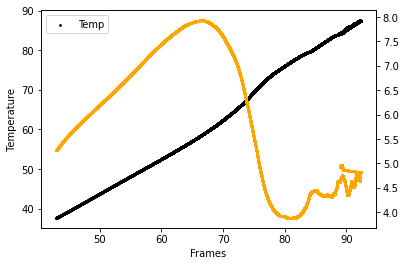

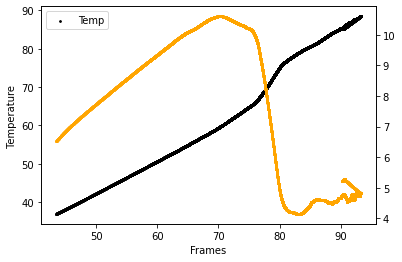

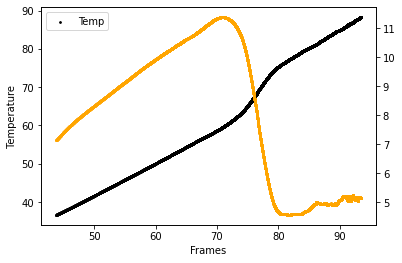

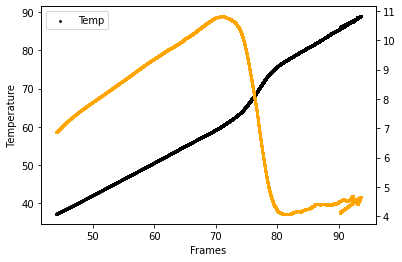

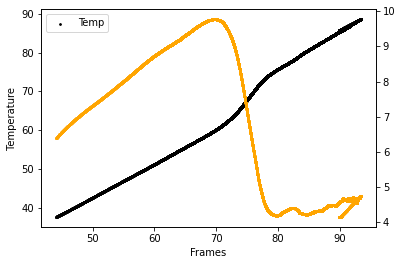

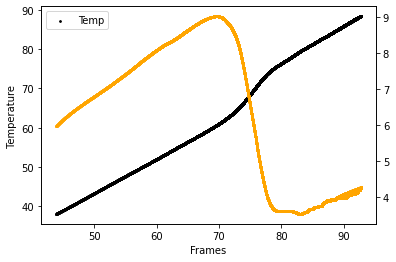

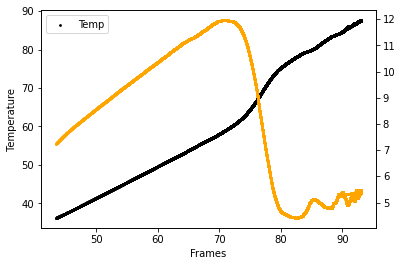

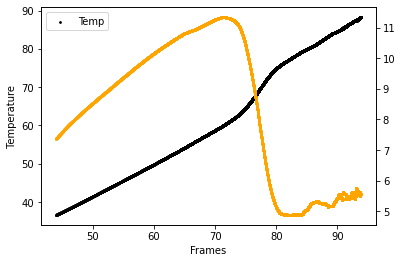

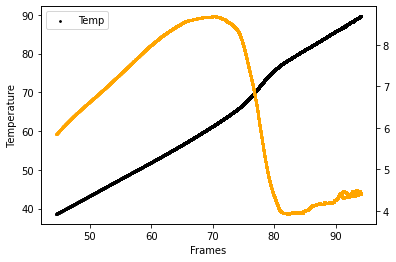

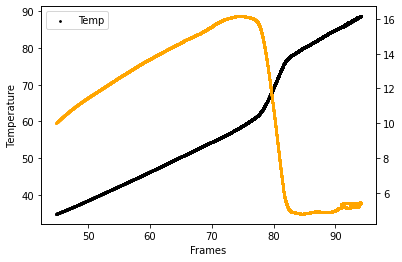

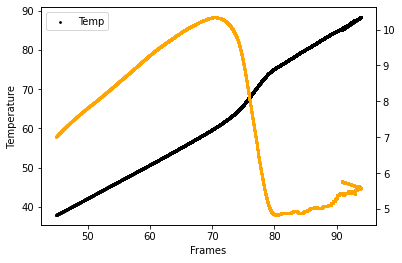

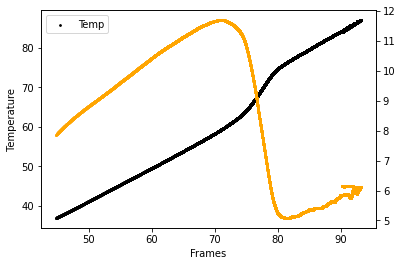

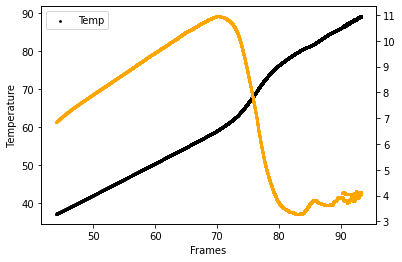

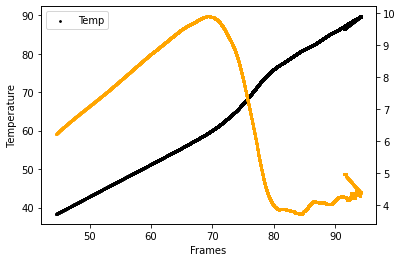

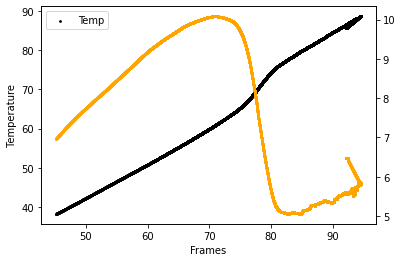

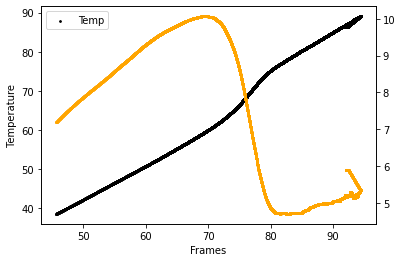

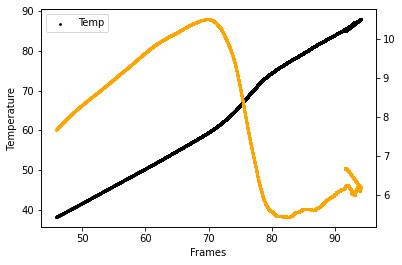

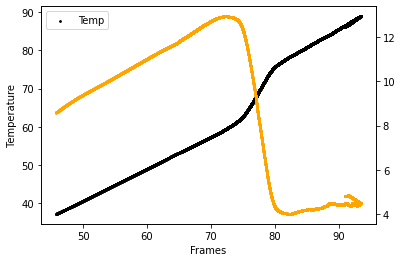

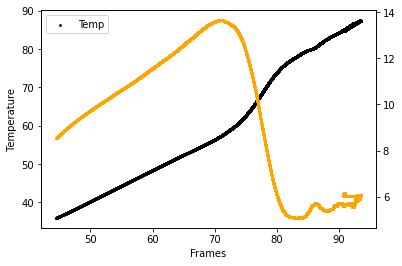

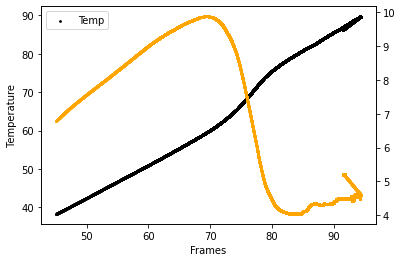

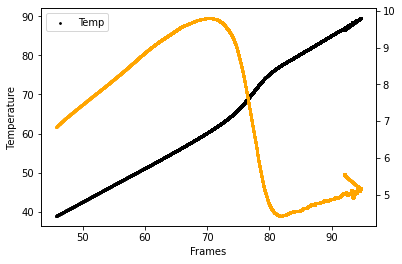

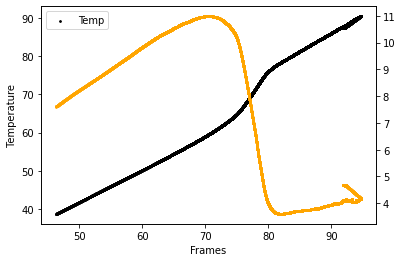

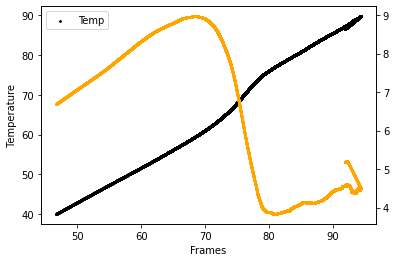

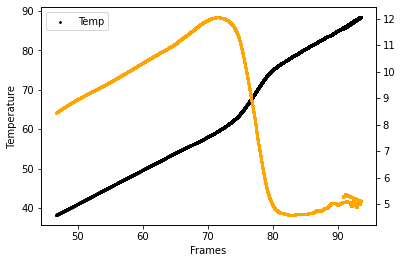

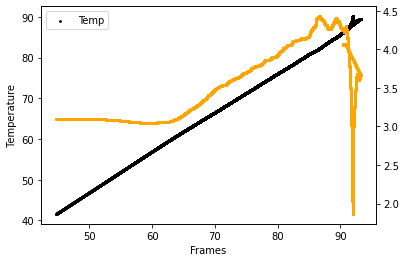

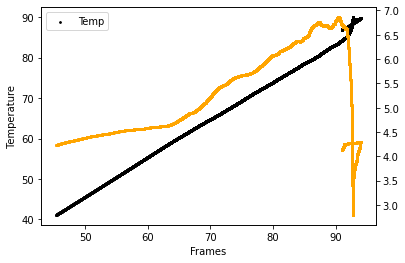

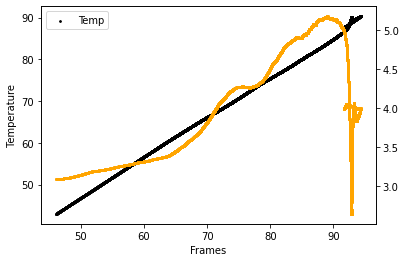

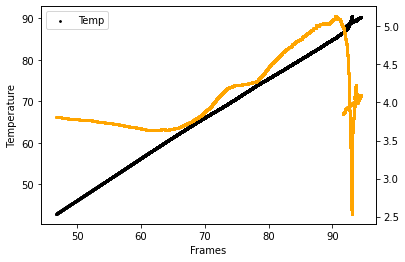

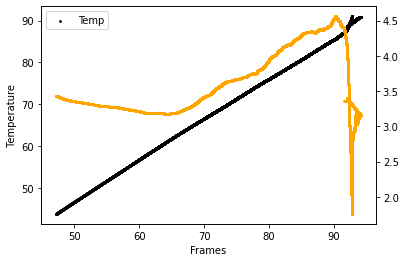

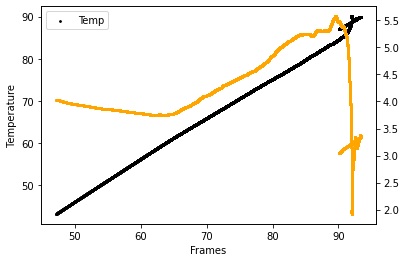

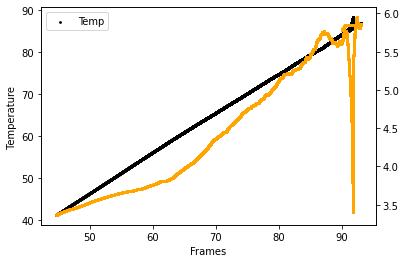

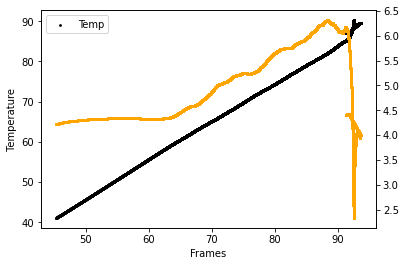

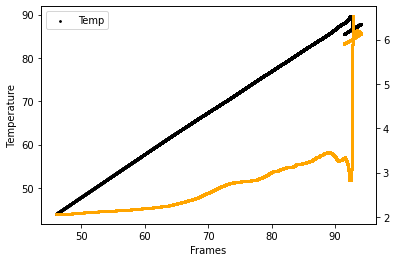

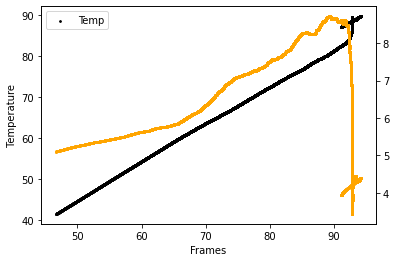

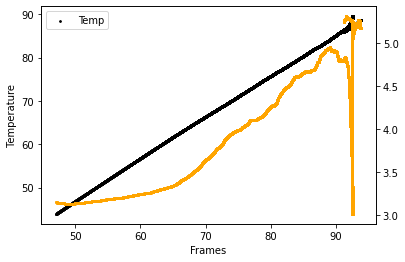

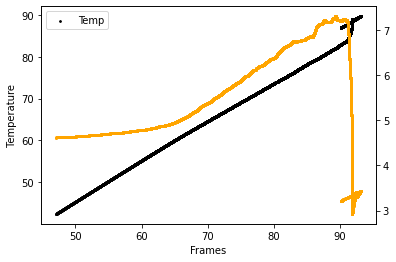

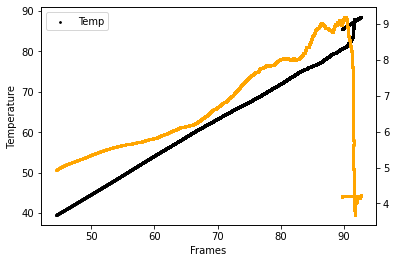

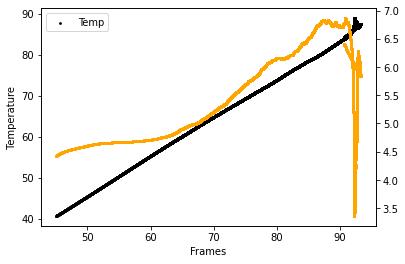

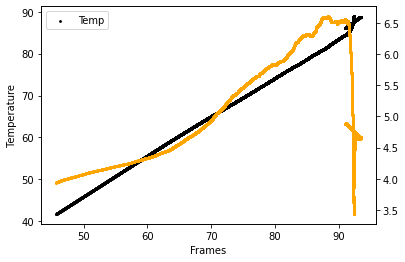

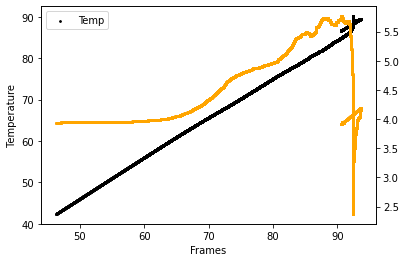

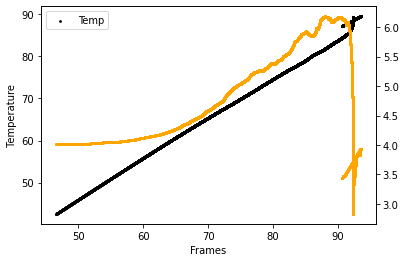

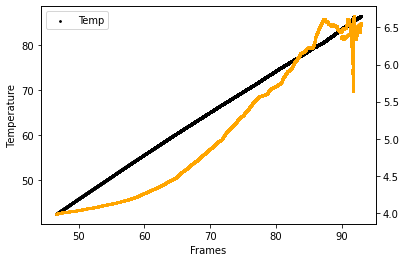

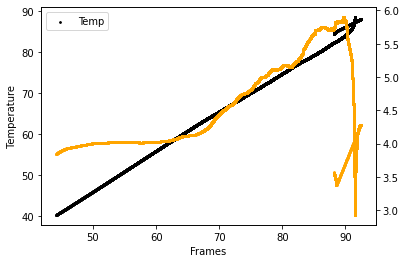

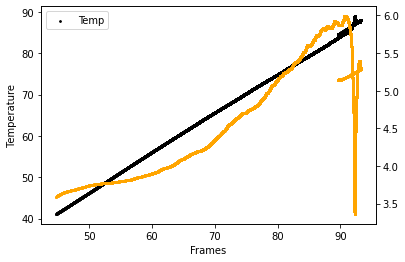

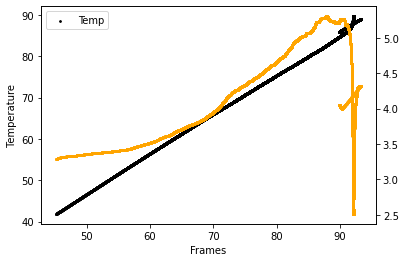

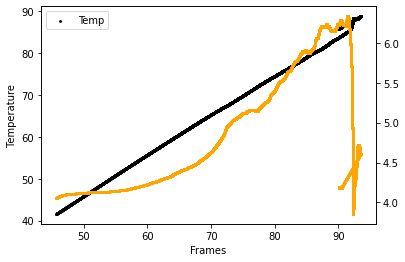

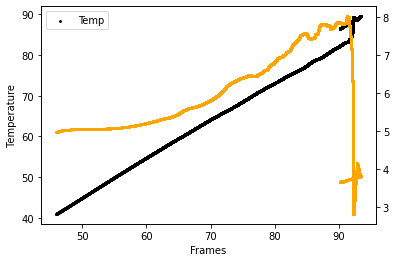

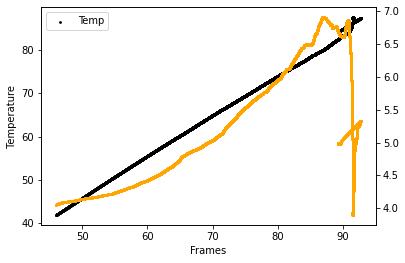

In [34]:
for i in range(len(plate_temp_48)):
    df = baseline_method2(plate_temp_48[i], sample_temp_48[i])

NameError: name 'x_line' is not defined

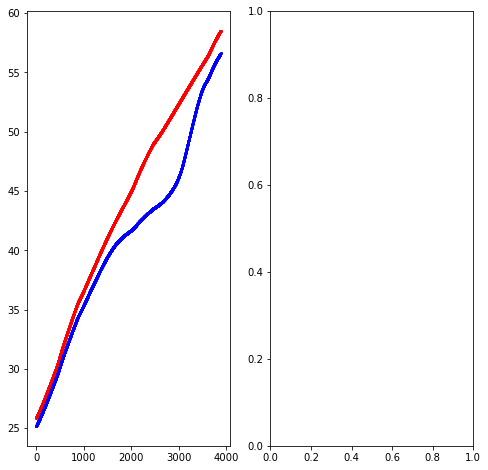

In [53]:
frame_num = np.linspace(1,len(x_av), len(x_av))

fig, ax= plt.subplots(1,2, figsize=(8,8))
ax[0].scatter(frame_num,x_av, c='red', label='Plate Temp', s=3)
ax[0].scatter(frame_num,y_av, c='blue', label='Sample Temp', s=3)
ax[0].plot(x_line, y_line, label='linear_fit', c='k')
ax[0].set_xlabel('Frames')
ax[0].set_ylabel(' Temperature ')
ax[0].legend()
ax[1].scatter(x_av, y_av, c='maroon', label='Sample Temp', s=3)
ax[1].plot(x_line2, y_line2, label='linear_fit', c='k')
ax[1].set_xlabel('Plate Temperature')
ax[1].set_ylabel(' Sample Temperature ')
ax[1].legend()

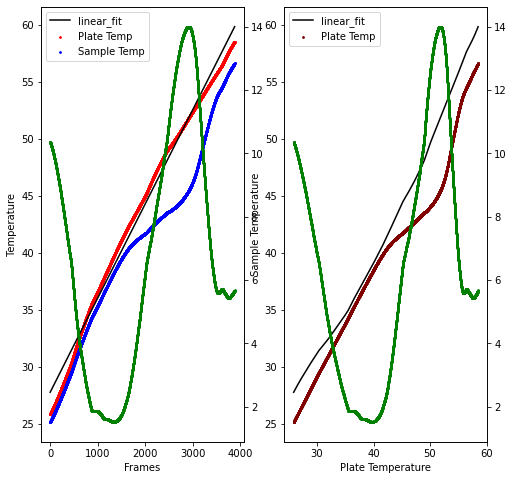

In [156]:
frame_num = np.linspace(1,len(x_av), len(x_av))

per_diff = [(y_line[i]-y_av[i])/y_av[i]*100 for i in range(len(y_av))]
per_diff2 = [(y_line2[i]-y_av[i])/y_av[i]*100 for i in range(len(y_av))]

# fig,ax= plt.subplots()
# ax.scatter(frame_num,x_av, c='red', label='Plate Temp', s=3)
# ax.scatter(frame_num,y_av, c='blue', label='Sample Temp', s=3)
# ax.plot(x_line, y_line, label='linear_fit', c='k')
# ax1=ax.twinx()
# ax1.scatter(frame_num, per_diff, c='green', label='percent differnce', s=3)
# ax1.set_ylabel('Percent Difference')
# ax.set_xlabel('Frames')
# ax.set_ylabel(' Temperature ')
# # ax2= ax.twiny()
# # ax2.scatter(x_av,y_av, c='orange')
# ax.legend()



fig, ax= plt.subplots(1,2, figsize=(8,8))
ax[0].scatter(frame_num,x_av, c='red', label='Plate Temp', s=3)
ax[0].scatter(frame_num,y_av, c='blue', label='Sample Temp', s=3)
ax[0].plot(x_line, y_line, label='linear_fit', c='k')
ax0=ax[0].twinx()
ax0.scatter(frame_num, per_diff, c='green', label='percent differnce', s=3)
ax[0].set_xlabel('Frames')
ax[0].set_ylabel(' Temperature ')
ax[0].legend()
ax[1].scatter(x_av, y_av, c='maroon', label='Plate Temp', s=3)
ax[1].plot(x_line2, y_line2, label='linear_fit', c='k')
ax1=ax[1].twinx()
ax1.scatter(x_av, per_diff2, c='green', label='percent differnce', s=3)
ax[1].set_xlabel('Plate Temperature')
ax[1].set_ylabel(' Sample Temperature ')
ax[1].legend()

### Use linear fit

Define a function to perform a linear fit

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
def linear_fit(x,y):
    
    x = np.array(x).reshape(-1,1)
    reg = LinearRegression().fit(x,y)
    r2= reg.score(x,y)
    slope= reg.coef_
    intercept= reg.intercept_
    
    return reg

In [120]:
x = x_av[:1000]
y = y_av[:1000]

reg = linear_fit(x,y)
x_line = np.array(x_av).reshape(-1,1)
y_line= reg.predict(x_line)

per_diff = [(y_line[i]-y_av[i])/y_av[i]*100 for i in range(len(y_av))]

Text(0, 0.5, 'Percent Difference')

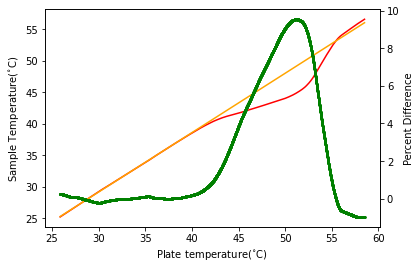

In [125]:
fig, ax= plt.subplots()
ax.plot(x_av, y_av,"r", label= 'data')
ax.plot(x_line, y_line, 'orange', label= 'baseline')
ax1 =ax.twinx()
ax1.scatter(x_av, per_diff, c='green', label='percent differnce', s=3)
ax.set_xlabel('Plate temperature($^{\circ}$C)')
ax.set_ylabel('Sample Temperature($^{\circ}$C)')
ax1.set_ylabel('Percent Difference')

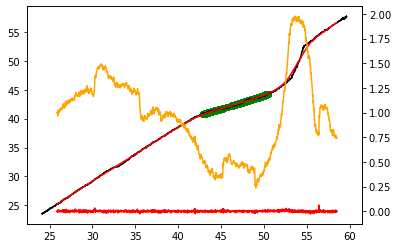

In [103]:
dx= y_data[1]-y_data[0]
dx_smooth = y_av[1]-y_av[0]

der_og = np.gradient(y_data, dx)
der_smooth = np.gradient(y_av,dx_smooth )

dx_smooth2= der_smooth[1]-der_smooth[0]

der_og2 = np.gradient(der_og)
der_smooth2 = np.gradient(der_smooth)

fig,ax = plt.subplots()
ax.plot(x_data,y_data,"k")
ax.plot(x_av, y_av,"r")
ax.scatter(x_av[test_data], y_av[test_data], c='green')
ax1 =ax.twinx()
# ax1.plot(x_data, der_og, c= 'gray')
ax1.plot(x_av,der_smooth, c='orange')
ax1.plot(x_av,der_smooth2, c='r')

In [95]:
len(der_smooth)

3877

In [97]:
test_data= [ i for i in range(len(der_smooth)) if round(der_smooth[i])==0]


[1719,
 1720,
 1721,
 1722,
 1723,
 1724,
 1725,
 1726,
 1727,
 1728,
 1729,
 1734,
 1735,
 1744,
 1745,
 1746,
 1747,
 1748,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788,
 1789,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,

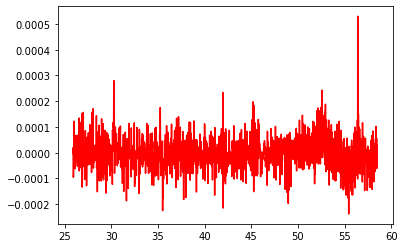

In [66]:
fig,ax = plt.subplots()
# ax.plot(x_data, der_og2, c= 'k')
ax.plot(x_av,der_smooth2, c='r')

### Fit a spline

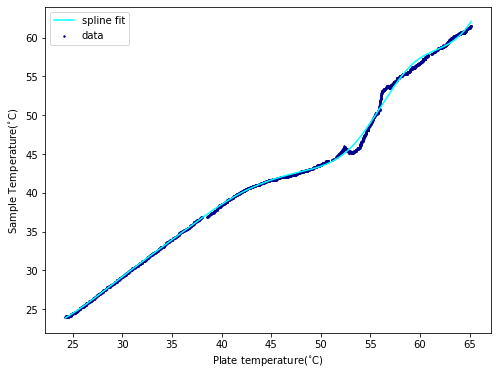

In [85]:
df = pd.DataFrame(data=[plate_temp_24[0], sample_temp_24[0]]).T
df.columns = ['p_temp','s_temp']
df=df.sort_values(by='p_temp', ignore_index=True)

df2 = df[~df['p_temp'].duplicated()]
p_new = np.asarray(df2['p_temp'])
s_new = np.asarray(df2['s_temp'])

t = np.linspace((p_new[1]),(p_new[-2]),8)
p_space = np.linspace((p_new[1]),(p_new[-2]),300)
interp = LSQUnivariateSpline(p_new, s_new, k=3,t=t)
s_interp = interp(p_space)


#Use spline data
x_data= p_space
y_data= s_interp

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(p_new, s_new, label='data', c='darkblue', s=2)
ax.plot(p_space, s_interp, label='spline fit', c='cyan')
ax.set_xlabel('Plate temperature($^{\circ}$C)')
ax.set_ylabel('Sample Temperature($^{\circ}$C)')
ax.legend()
# ax1 = ax.twinx()
# ax1.scatter(x_data, der, c= 'red',s=3, label=' 1st derivative')
# ax1.scatter(x_data, der2, c= 'magenta',s=3, label=' 2nd derivative')
# ax.scatter(x_data, inv_der, c='purple', s=3, label=' inverse derivative')
# ax.scatter(x_data[peaks], inv_der[peaks], c='k')
# fig.legend(bbox_to_anchor=(.35,0.80))


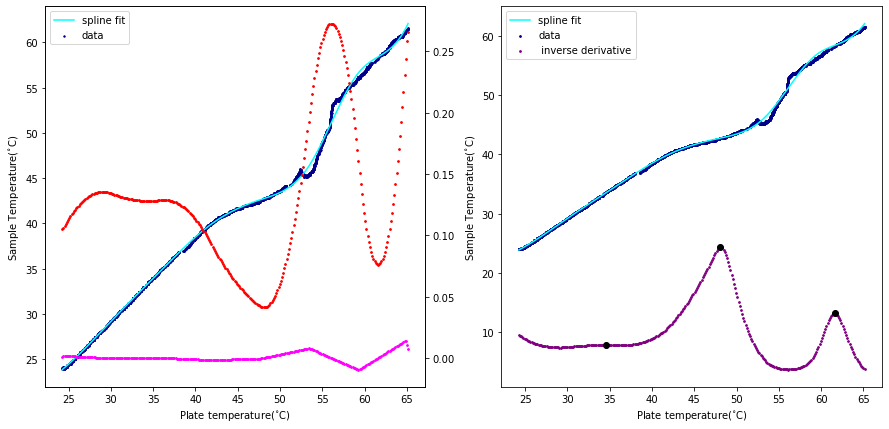

In [86]:
x_data,y_data,ax= apply_spline(plate_temp_24[0], sample_temp_24[0], plot=False)

## find derivatives of the data ##
der = np.gradient(y_data)
der2= np.gradient(der)

inv_der= 1/der
peaks, properties = find_peaks(inv_der, height=0)

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].scatter(plate_temp_24[0], sample_temp_24[0], label='data', c='darkblue', s=2)
ax[0].plot(x_data,y_data, label='spline fit', c='cyan')
ax[0].legend()
ax[0].set_xlabel('Plate temperature($^{\circ}$C)')
ax[0].set_ylabel('Sample Temperature($^{\circ}$C)')
ax1 = ax[0].twinx()
ax1.scatter(x_data, der, c= 'red',s=3, label=' 1st derivative')
ax1.scatter(x_data, der2, c= 'magenta',s=3, label=' 2nd derivative')
ax[1].scatter(p_new, s_new, label='data', c='darkblue', s=3)
ax[1].plot(p_space, s_interp, label='spline fit', c='cyan')
ax[1].scatter(x_data, inv_der, c='purple', s=3, label=' inverse derivative')
ax[1].scatter(x_data[peaks], inv_der[peaks], c='k')
ax[1].set_xlabel('Plate temperature($^{\circ}$C)')
ax[1].set_ylabel('Sample Temperature($^{\circ}$C)')
ax[1].legend()

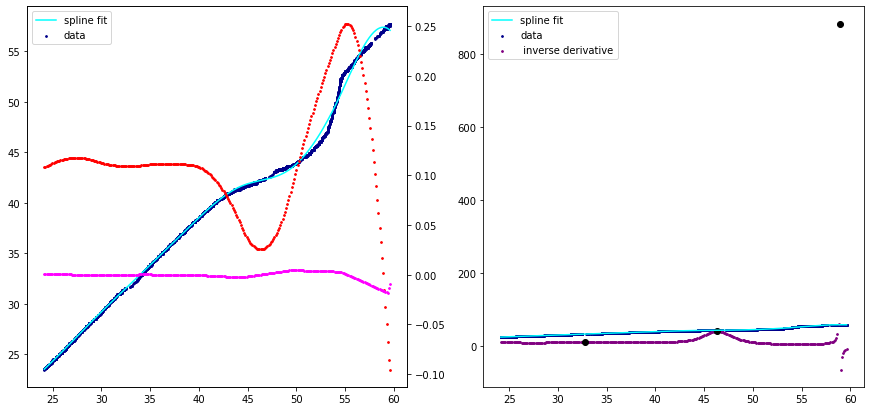

In [78]:
x_data,y_data,ax= apply_spline(plate_temp_48[0], sample_temp_48[0], plot=False)

## find derivatives of the data ##
der = np.gradient(y_data)
der2= np.gradient(der)

inv_der= 1/der
peaks, properties = find_peaks(inv_der, height=0)

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].scatter(plate_temp_48[0], sample_temp_48[0], label='data', c='darkblue', s=3)
ax[0].plot(x_data,y_data, label='spline fit', c='cyan')
ax[0].legend()
ax1 = ax[0].twinx()
ax1.scatter(x_data, der, c= 'red',s=3, label=' 1st derivative')
ax1.scatter(x_data, der2, c= 'magenta',s=3, label=' 2nd derivative')
ax[1].scatter(p_new, s_new, label='data', c='darkblue', s=3)
ax[1].plot(p_space, s_interp, label='spline fit', c='cyan')
ax[1].scatter(x_data, inv_der, c='purple', s=3, label=' inverse derivative')
ax[1].scatter(x_data[peaks], inv_der[peaks], c='k')
ax[1].legend()

#### Limitations of this method - 96  well plate

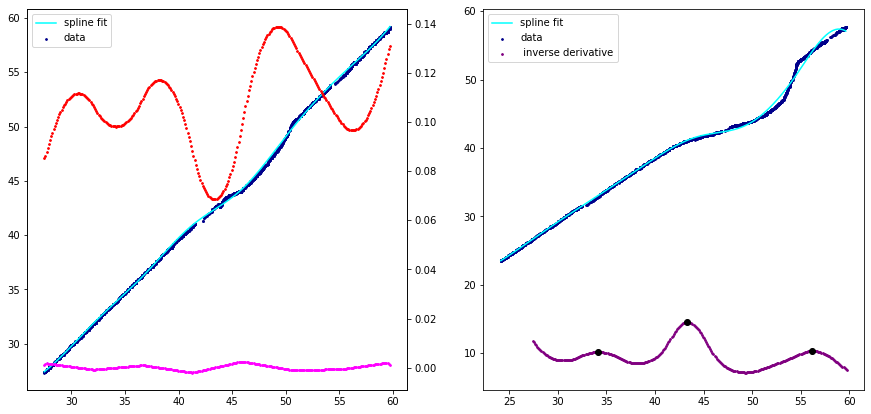

In [79]:
x_data,y_data,ax= apply_spline(plate_temp_96[0], sample_temp_96[0], plot=False)

## find derivatives of the data ##
der = np.gradient(y_data)
der2= np.gradient(der)

inv_der= 1/der
peaks, properties = find_peaks(inv_der, height=0)

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].scatter(plate_temp_96[0], sample_temp_96[0], label='data', c='darkblue', s=3)
ax[0].plot(x_data,y_data, label='spline fit', c='cyan')
ax[0].legend()
ax1 = ax[0].twinx()
ax1.scatter(x_data, der, c= 'red',s=3, label=' 1st derivative')
ax1.scatter(x_data, der2, c= 'magenta',s=3, label=' 2nd derivative')
ax[1].scatter(p_new, s_new, label='data', c='darkblue', s=3)
ax[1].plot(p_space, s_interp, label='spline fit', c='cyan')
ax[1].scatter(x_data, inv_der, c='purple', s=3, label=' inverse derivative')
ax[1].scatter(x_data[peaks], inv_der[peaks], c='k')
ax[1].legend()

42.9


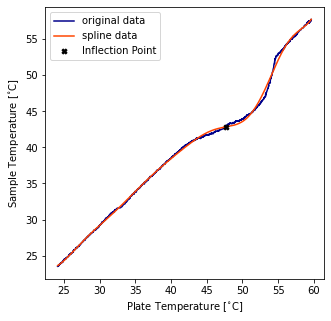

In [76]:
infl_t = inflection_temperature(plate_temp_48[0], sample_temp_48[0],plot=True)
print(infl_t)

### Test new spline on all wellplate data

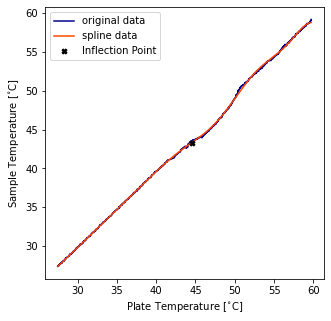

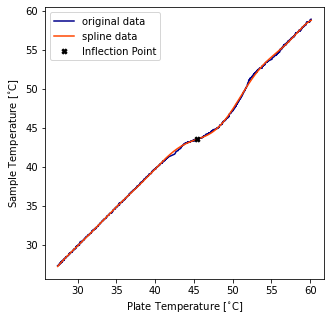

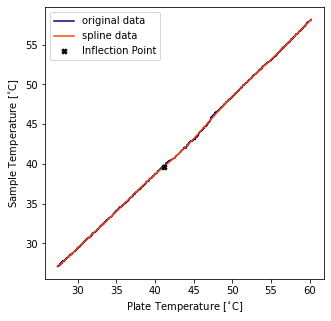

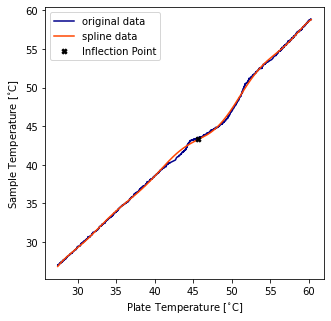

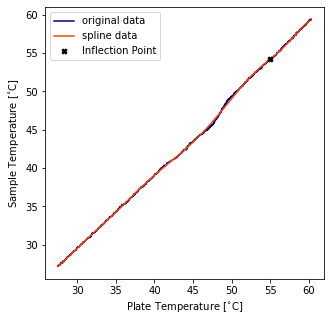

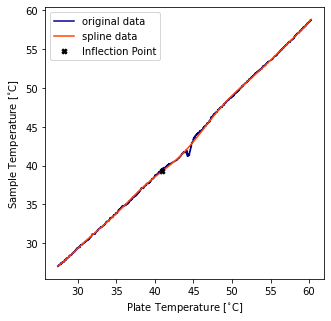

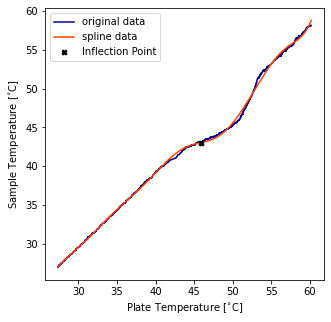

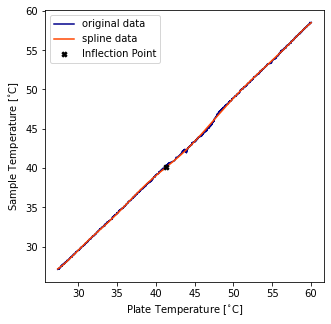

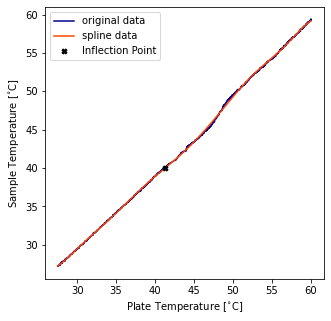

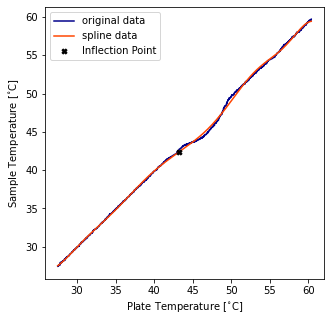

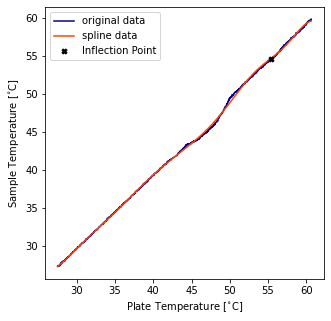

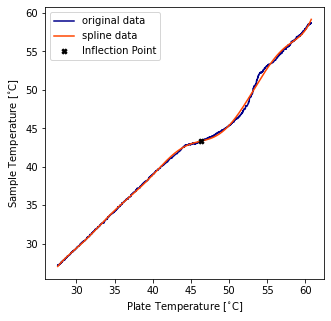

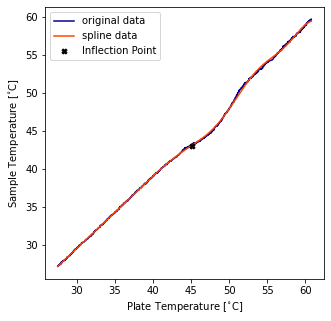

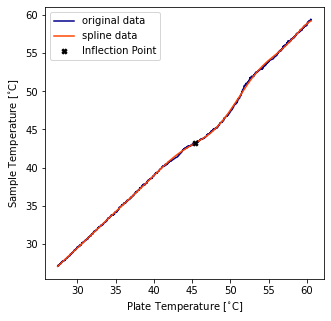

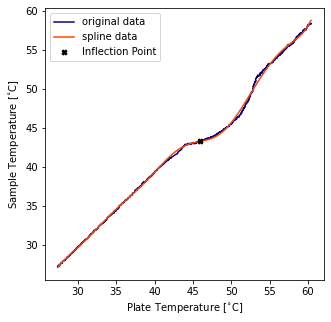

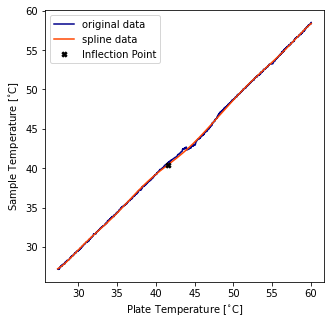

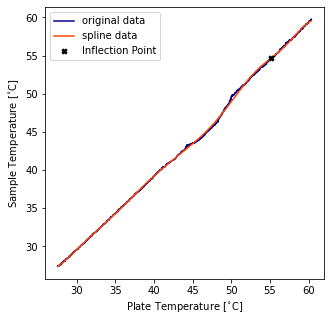

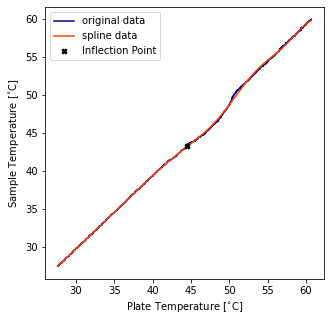

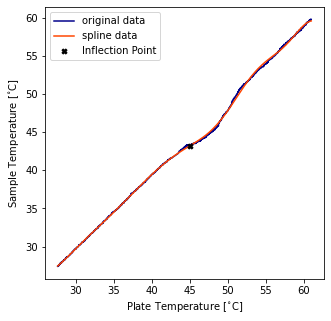

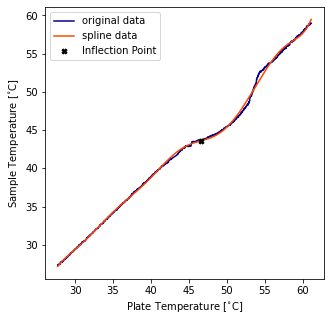

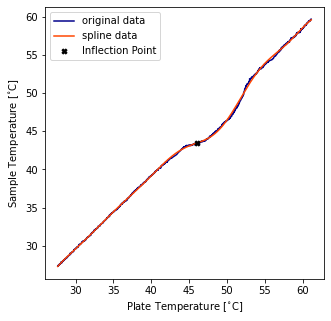

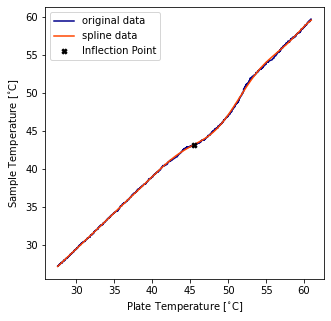

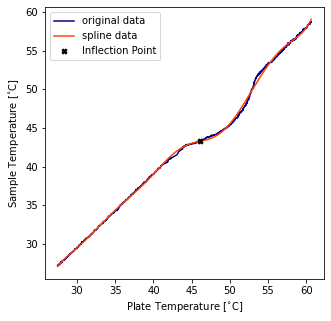

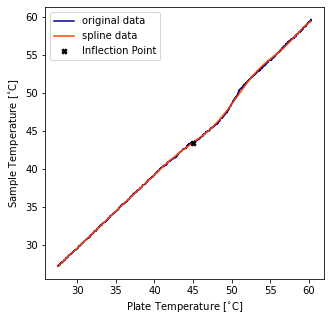

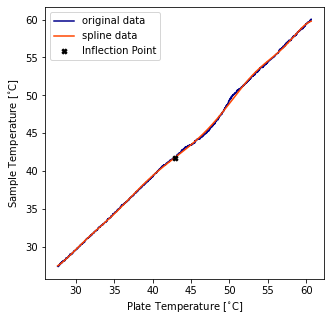

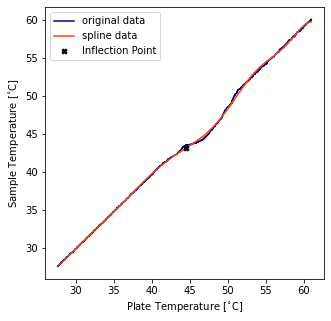

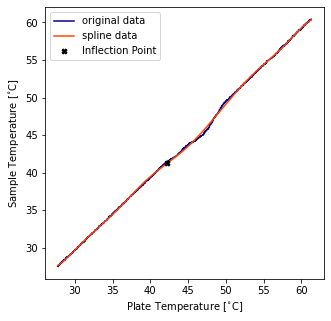

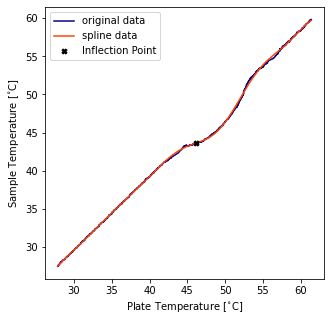

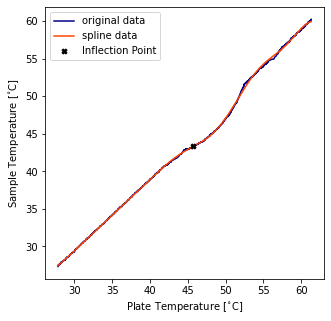

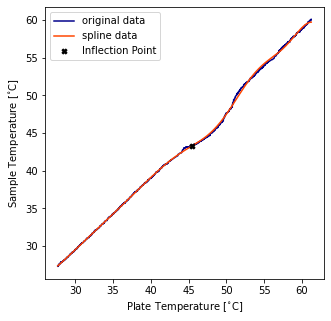

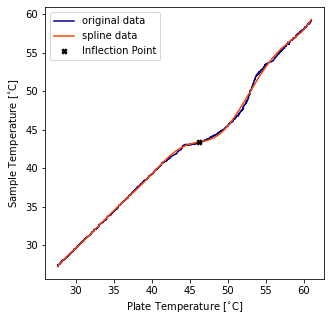

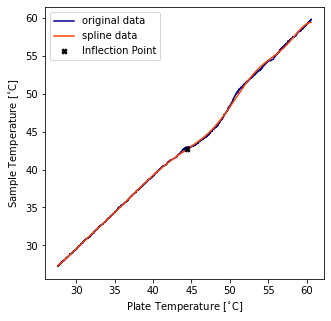

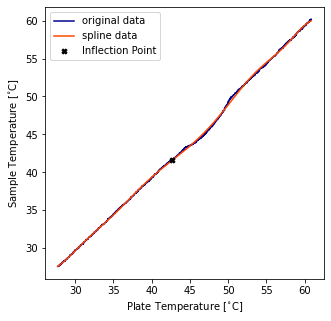

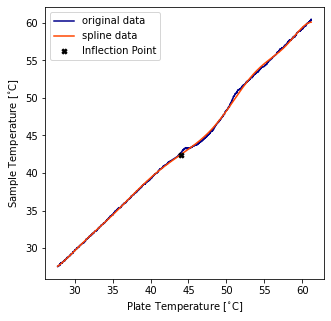

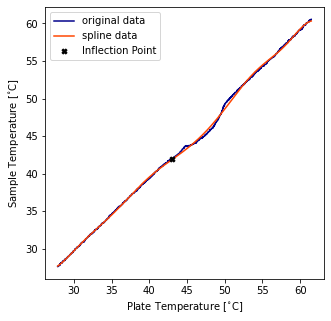

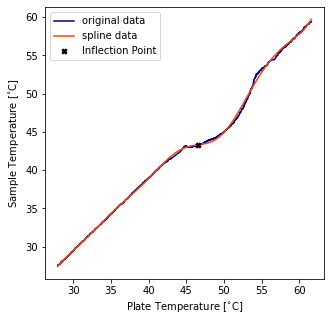

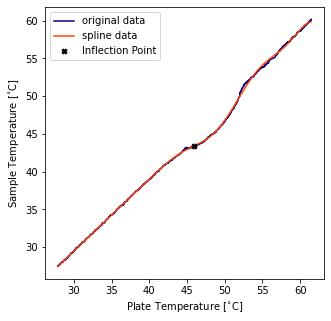

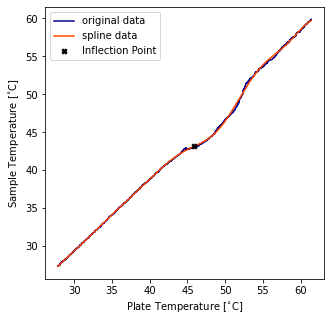

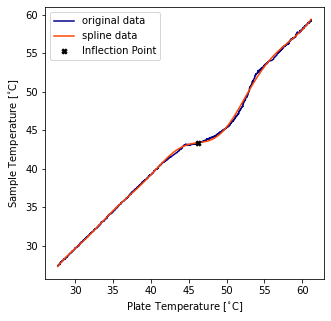

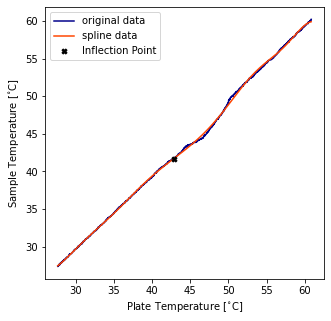

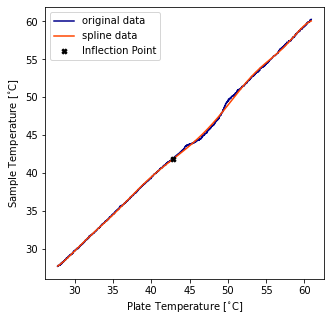

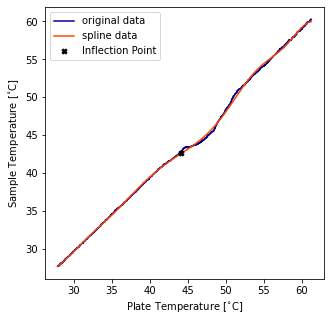

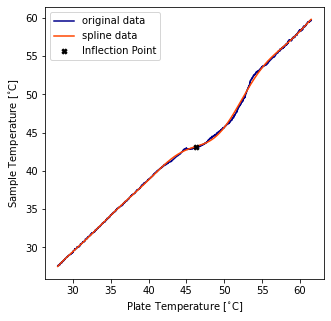

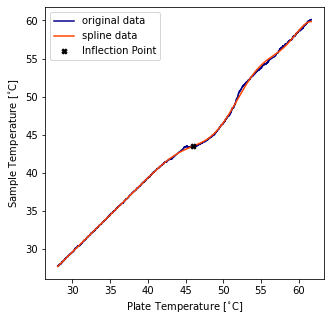

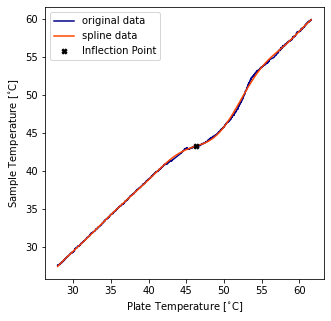

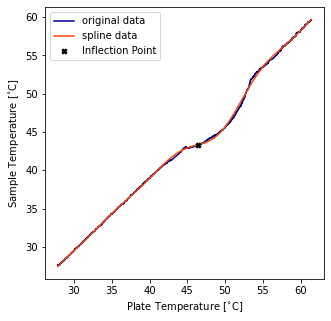

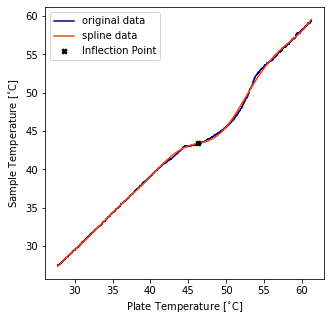

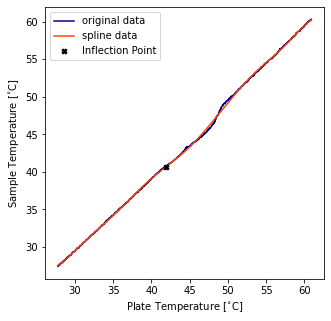

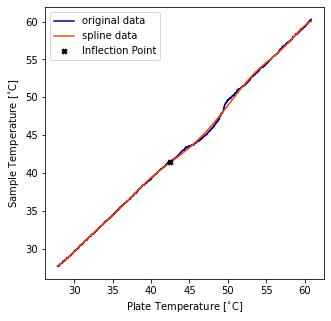

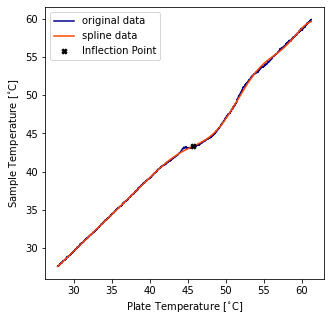

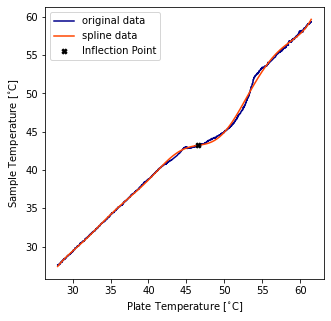

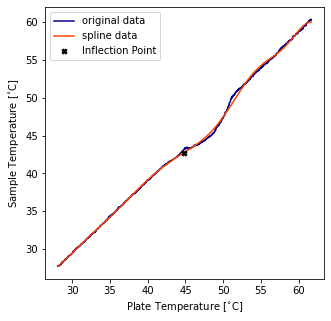

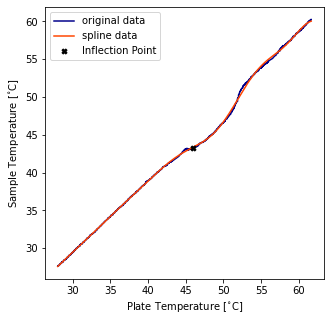

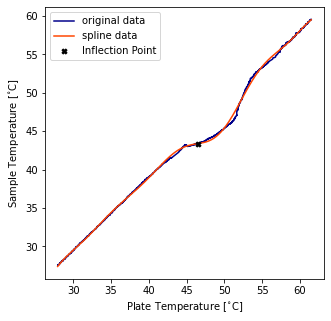

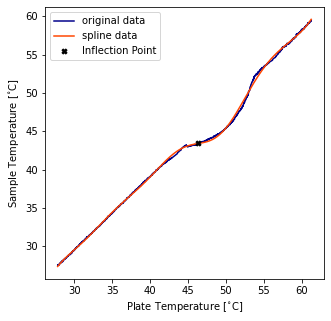

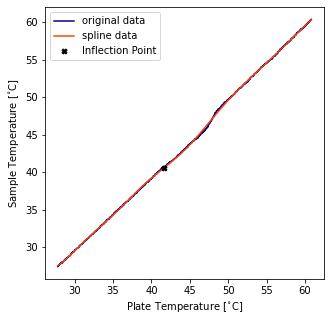

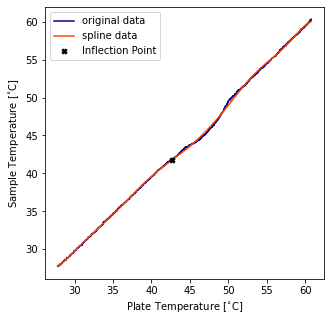

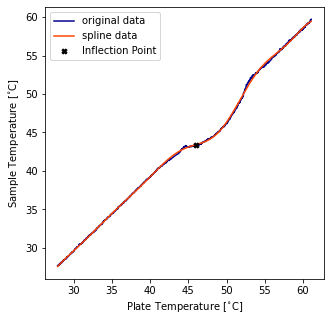

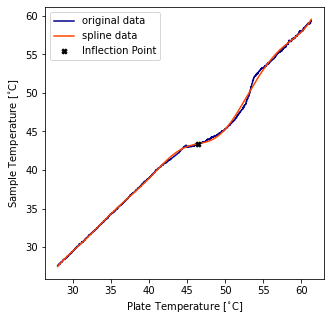

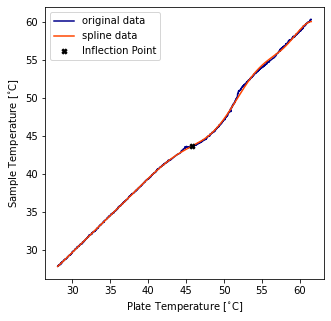

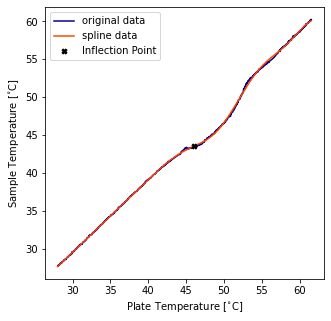

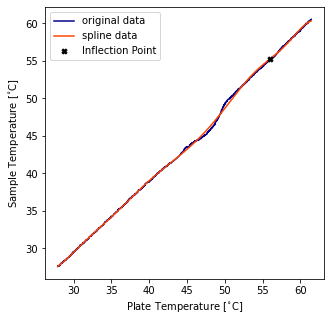

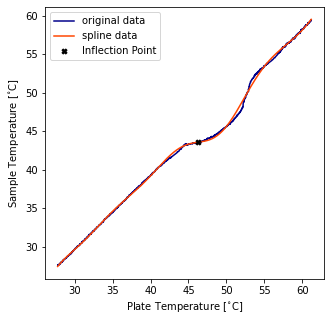

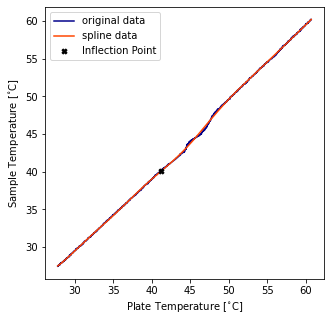

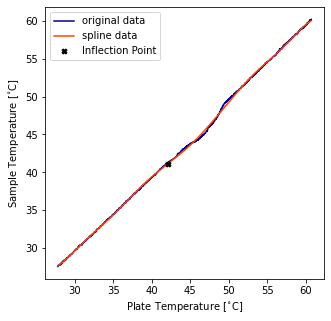

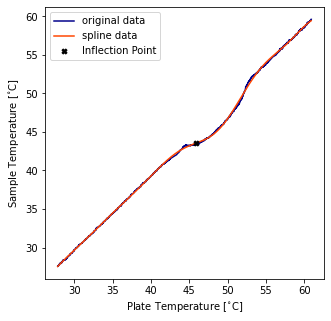

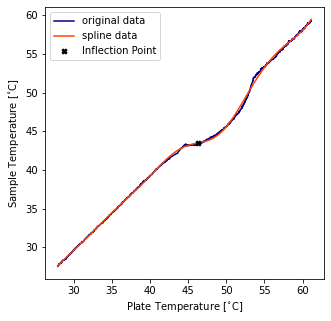

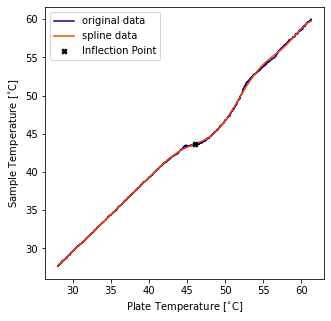

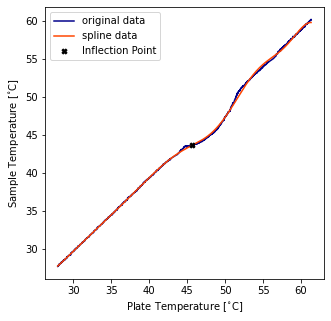

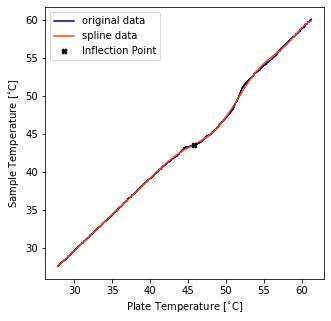

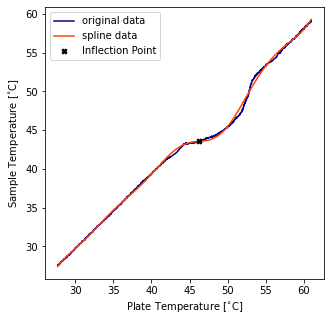

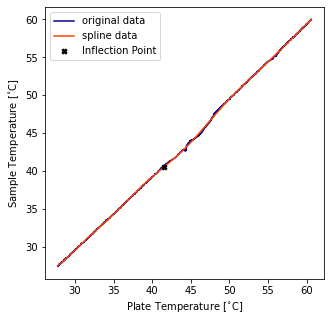

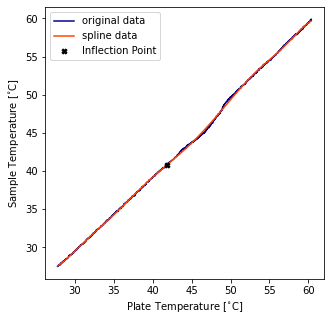

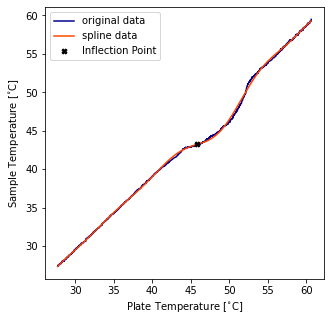

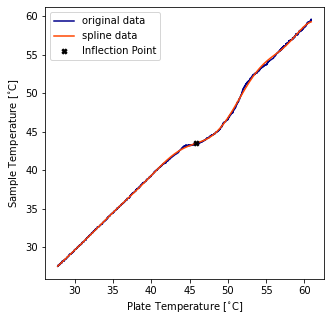

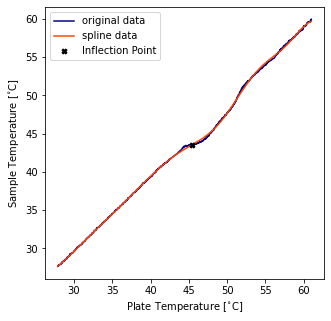

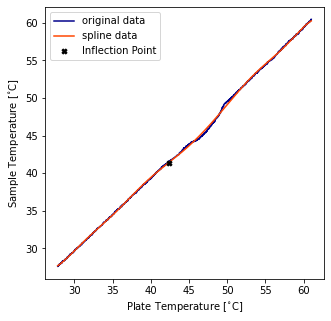

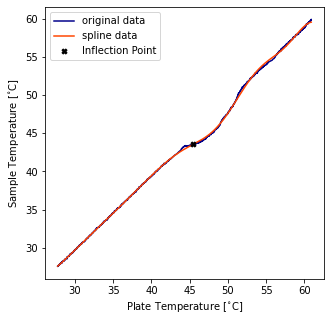

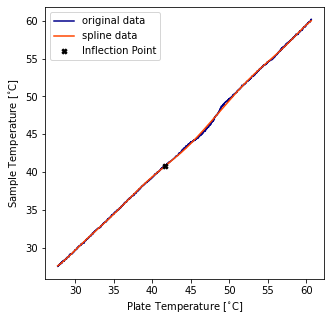

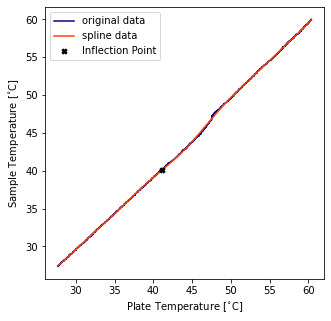

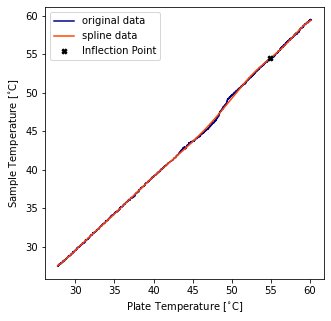

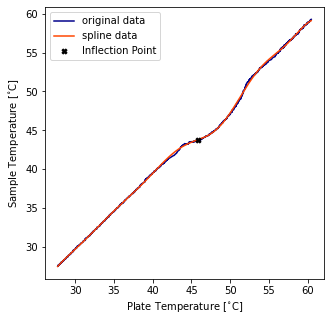

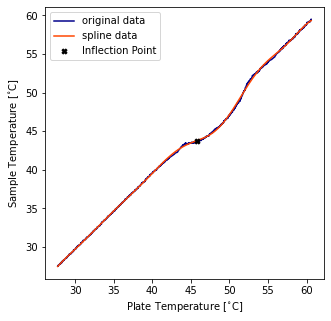

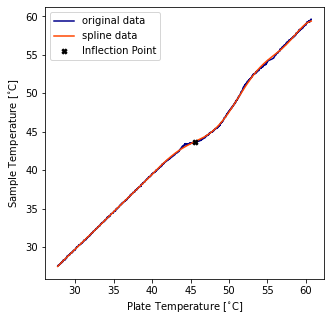

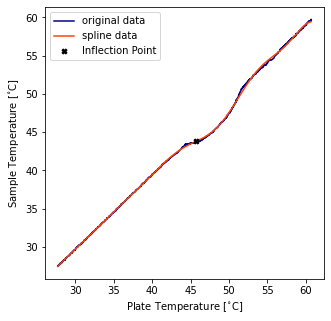

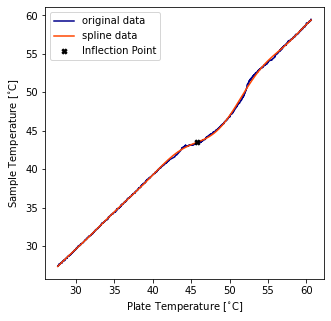

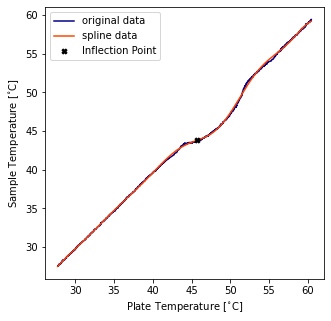

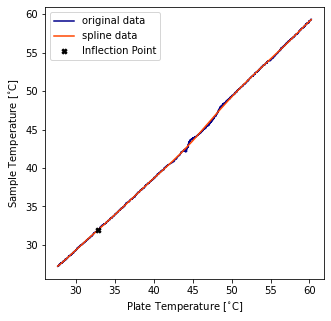

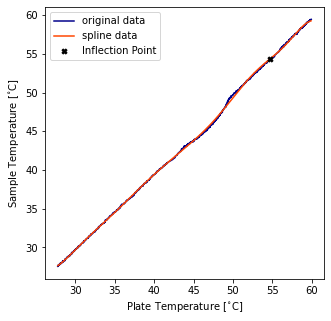

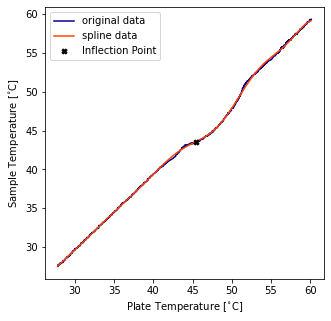

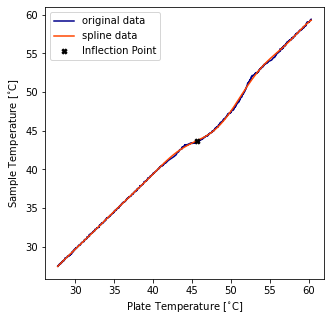

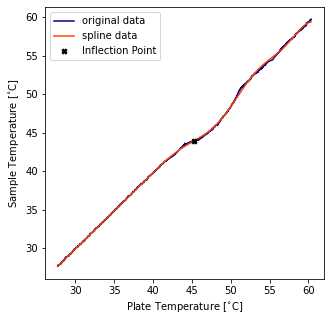

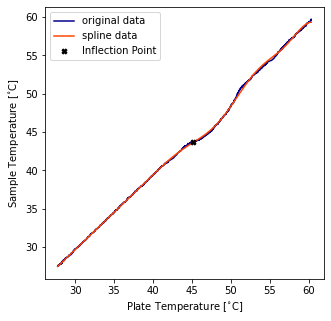

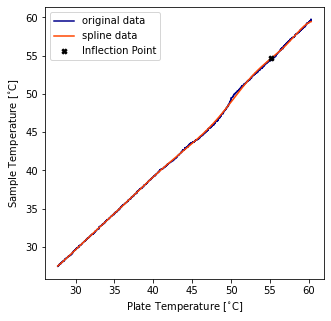

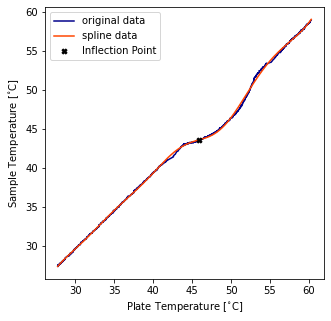

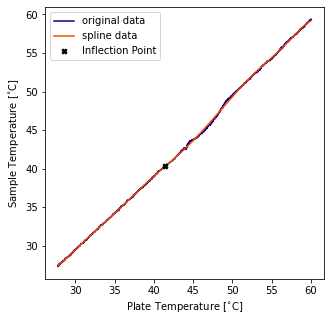

In [67]:
#### 96 wellplate ####
melt_temp_96 =[]

for i in range(len(sample_temp_96)):
    infl_t = inflection_temperature(plate_temp_96[i], sample_temp_96[i],plot=True)
    melt_temp_96.append(infl_t)

In [68]:
avg_temp_96 = np.average(melt_temp_96)
std_temp_96 = np.std(melt_temp_96)

print(r'Melting temp using 96 wellplate : {:.1f} '.format(avg_temp_96)+u'\u00b1'+' {:.1f}'.format(std_temp_96))

Melting temp using 96 wellplate : 43.5 ± 3.5


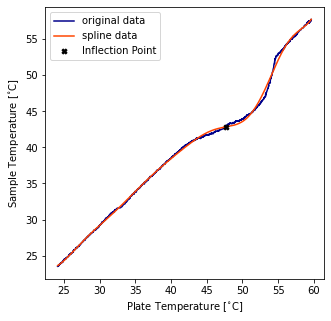

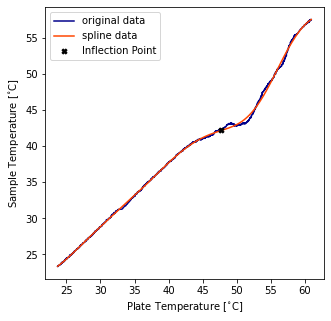

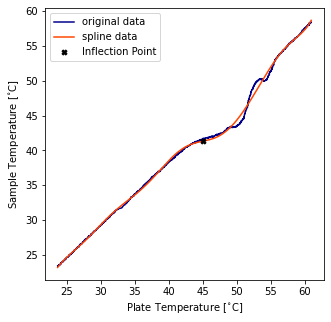

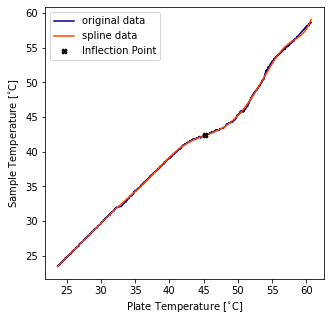

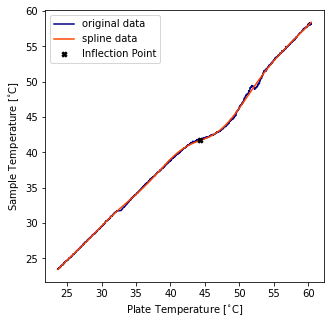

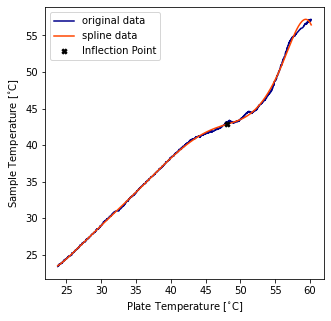

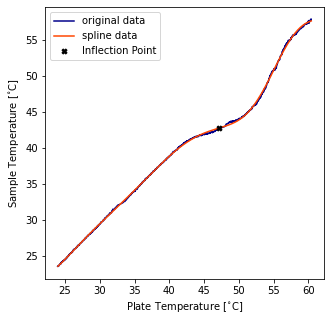

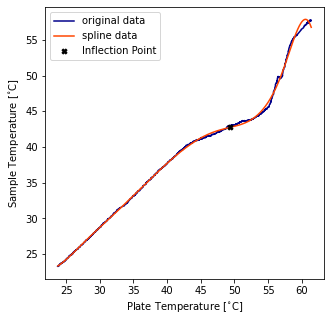

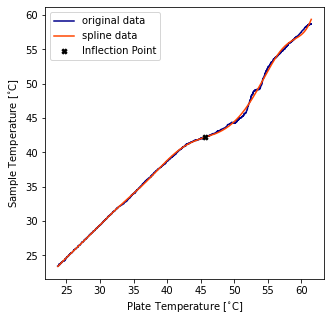

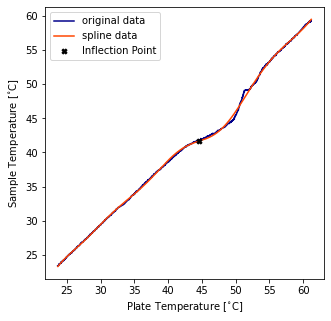

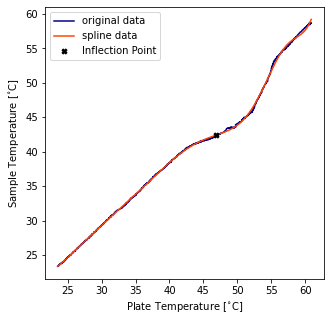

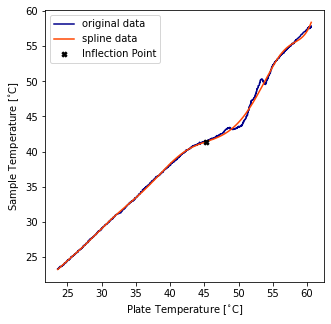

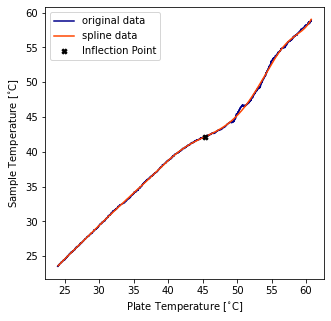

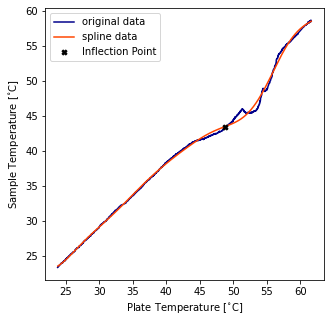

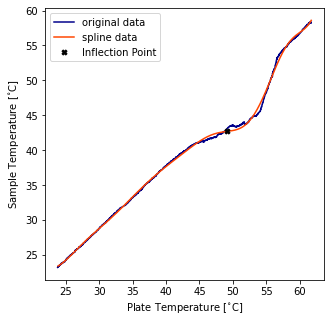

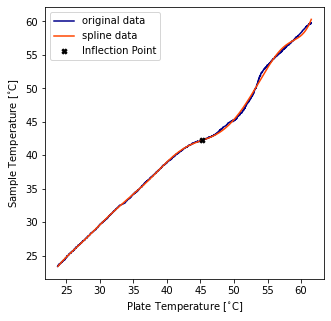

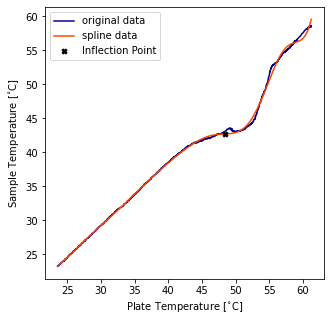

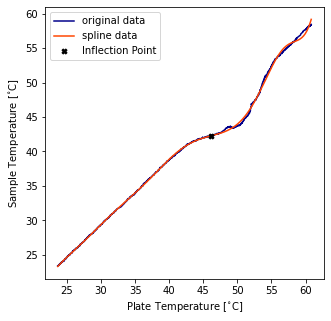

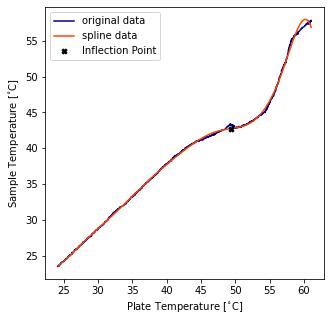

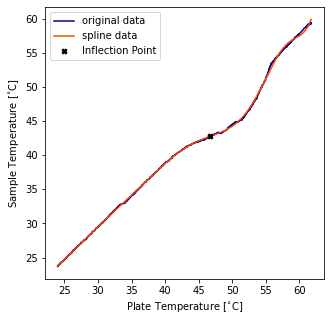

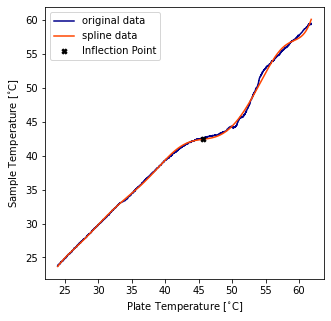

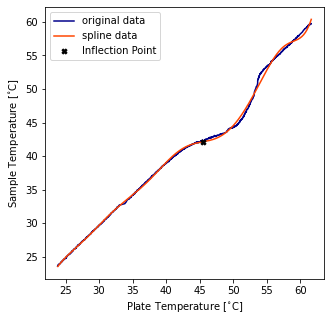

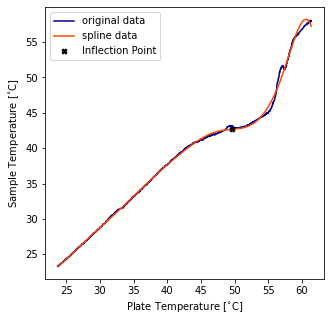

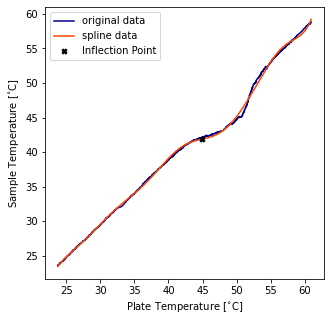

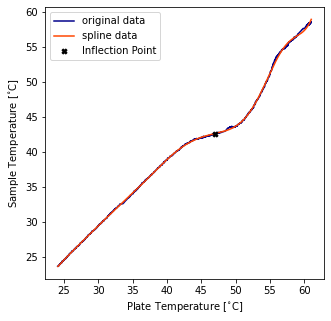

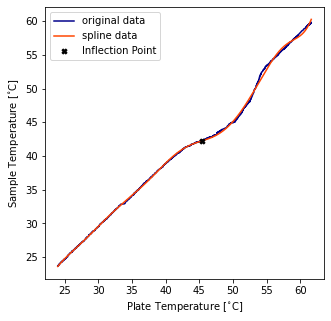

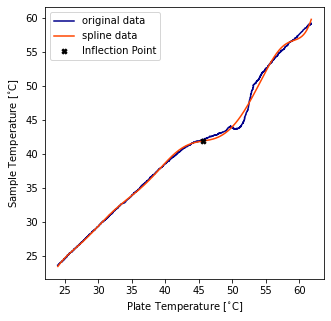

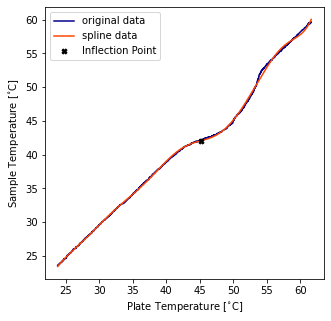

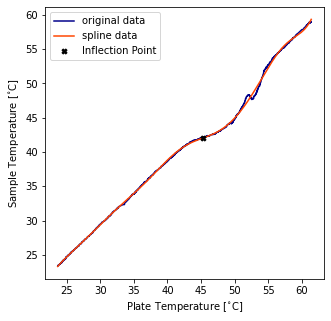

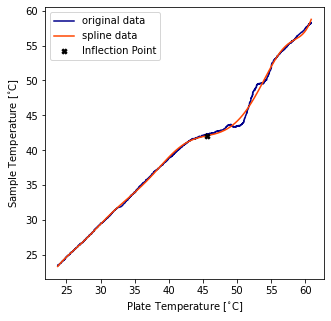

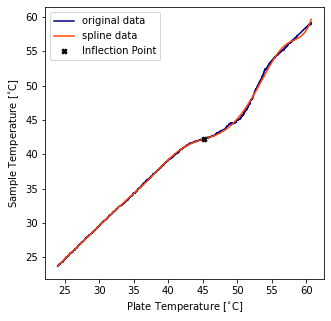

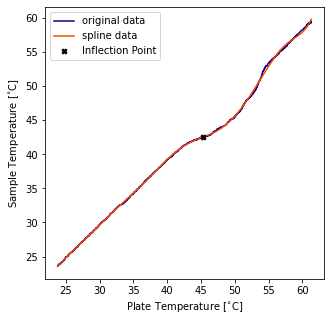

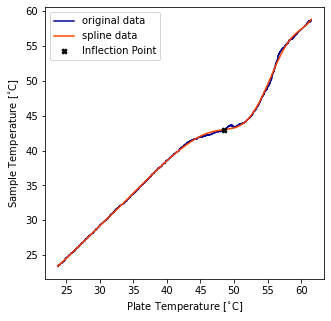

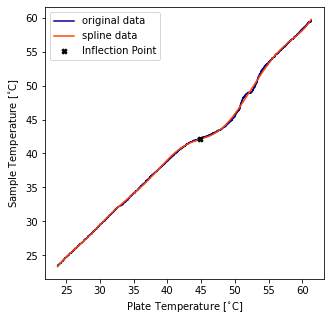

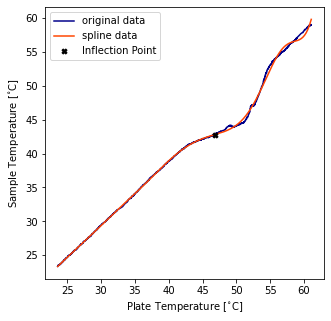

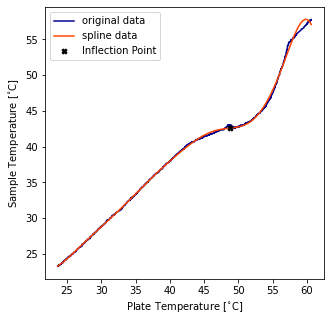

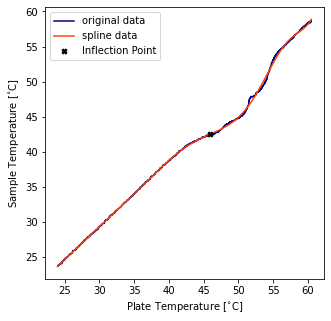

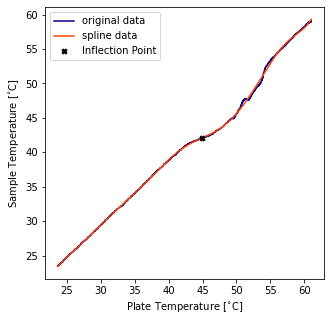

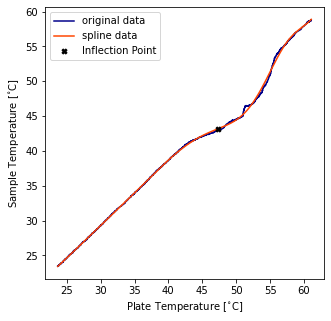

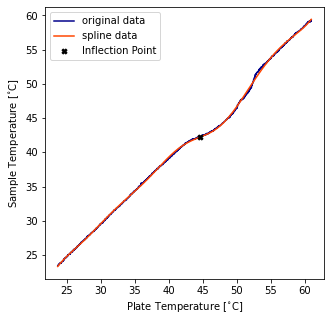

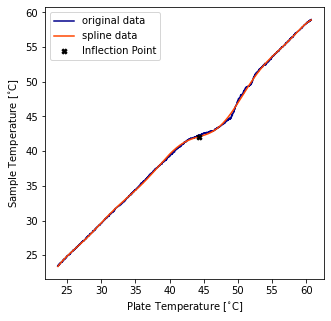

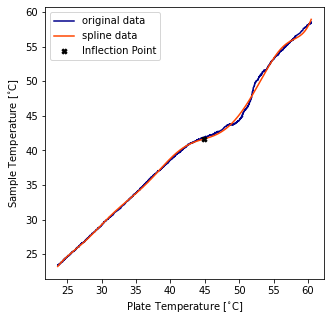

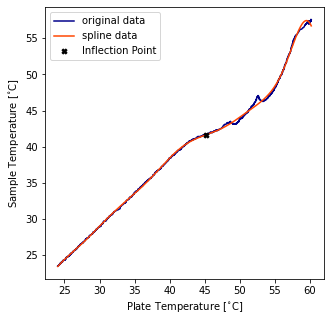

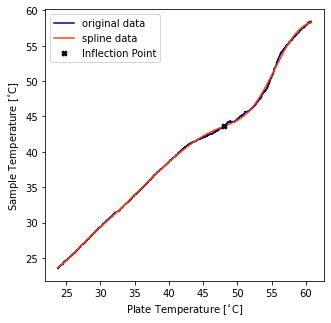

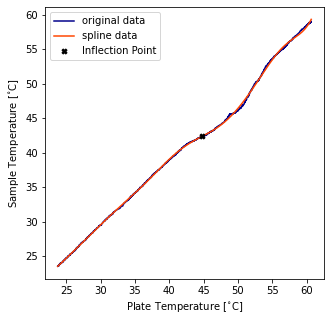

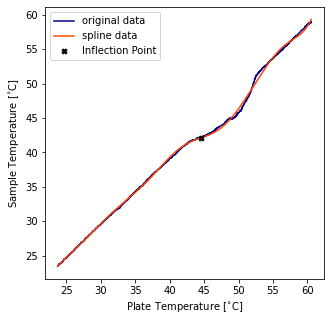

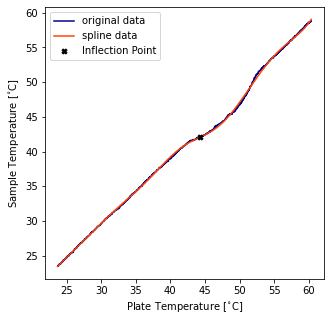

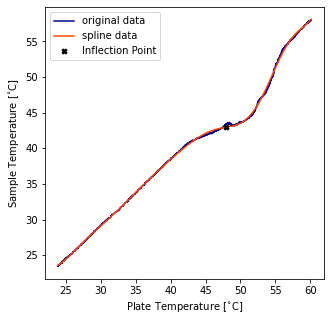

In [69]:
#### 48 wellplate ####
melt_temp_48 =[]

for i in range(len(sample_temp_48)):
    infl_t = inflection_temperature(plate_temp_48[i], sample_temp_48[i], plot=True)
    melt_temp_48.append(infl_t)

In [70]:
avg_temp_48 = np.average(melt_temp_48)
std_temp_48 = np.std(melt_temp_48)

print(r'Melting temp using 48 wellplate : {:.1f} '.format(avg_temp_48)+u'\u00b1'+' {:.1f}'.format(std_temp_48))

Melting temp using 48 wellplate : 42.4 ± 0.5


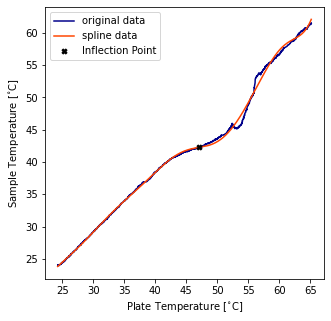

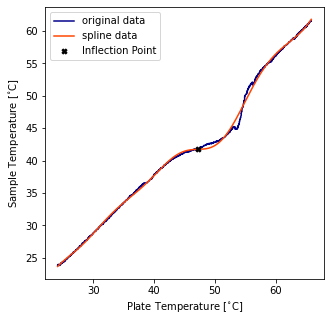

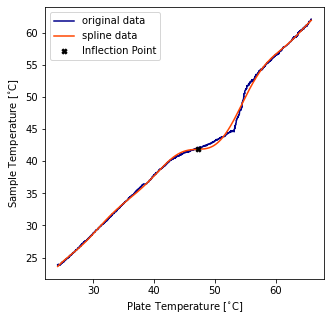

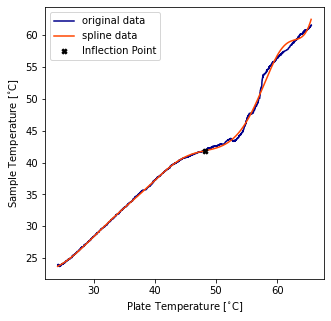

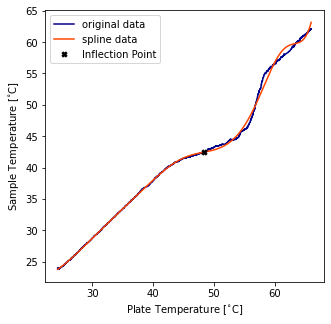

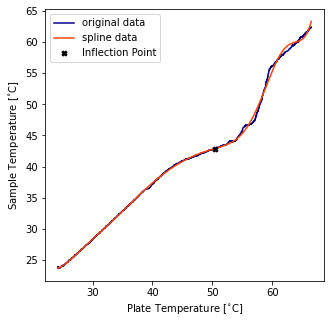

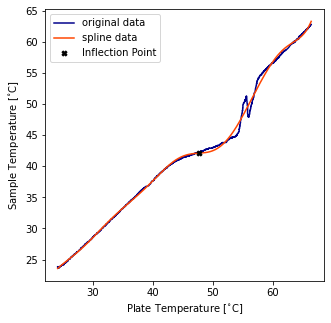

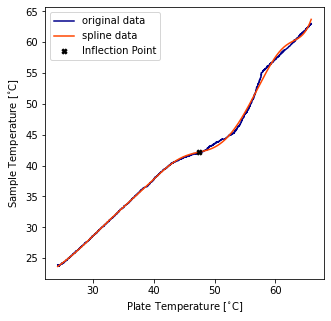

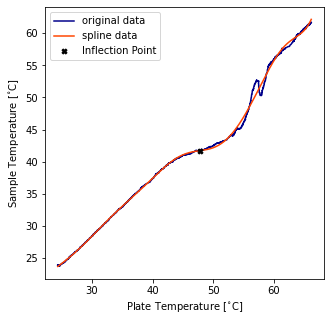

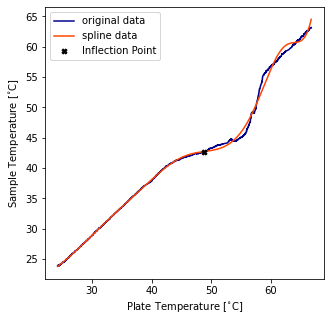

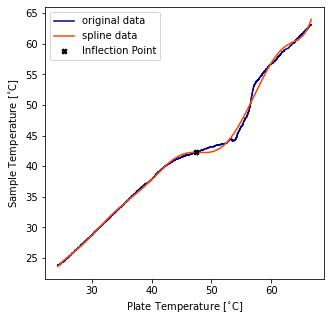

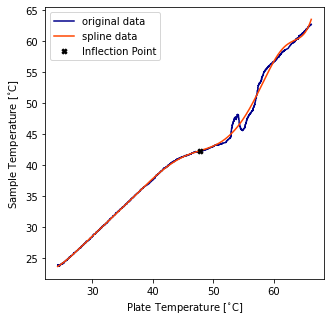

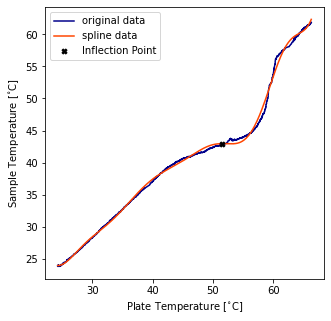

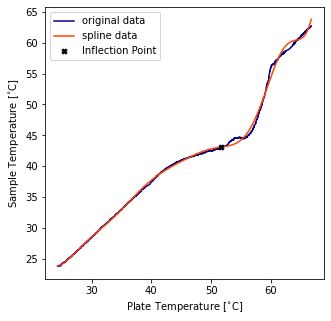

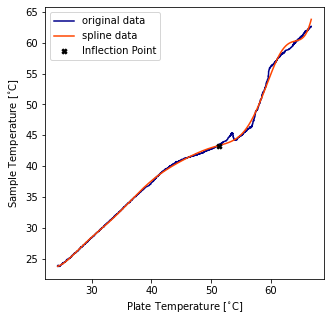

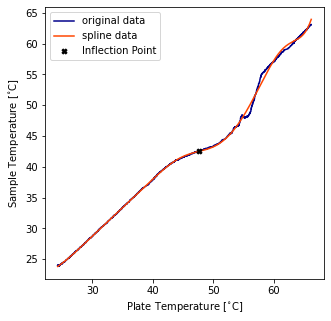

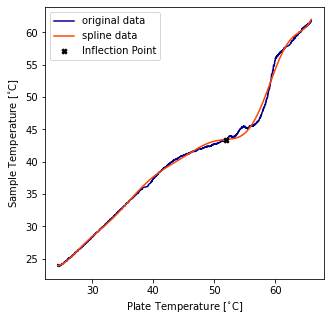

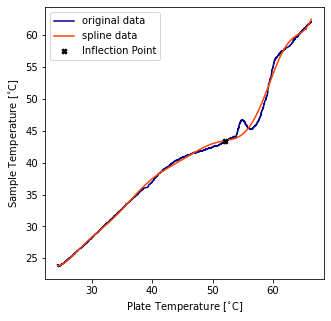

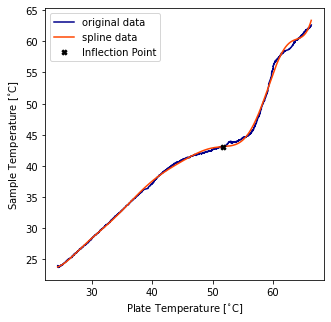

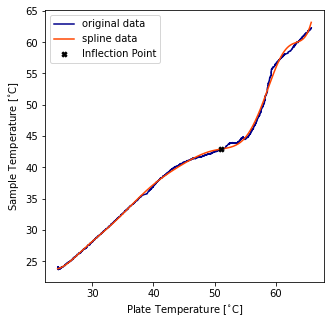

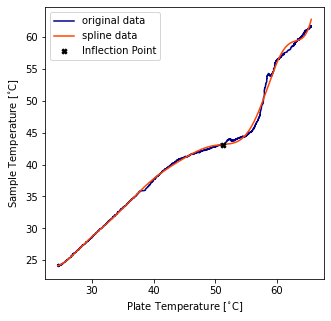

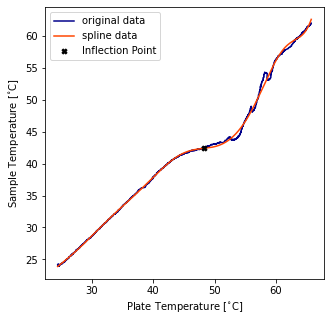

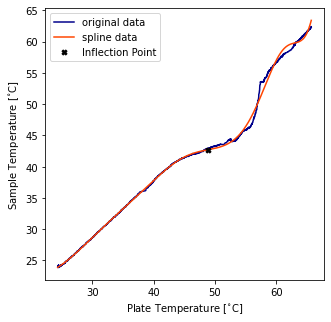

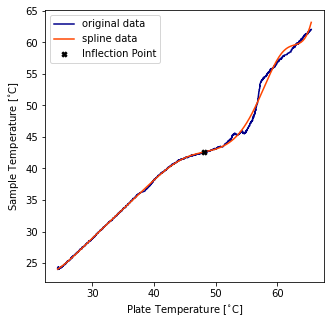

In [71]:
#### 24 wellplate ####
melt_temp_24 =[]

for i in range(len(sample_temp_24)):
    infl_t = inflection_temperature(plate_temp_24[i], sample_temp_24[i],plot=True)
    
    melt_temp_24.append(infl_t)

In [73]:
avg_temp_24 = np.average(melt_temp_24)
std_temp_24 = np.std(melt_temp_24)

print(r'Melting temp using 24 wellplate : {:.1f} '.format(avg_temp_24)+u'\u00b1'+' {:.1f}'.format(std_temp_24))

Melting temp using 24 wellplate : 42.6 ± 0.5


In [44]:
# Inputting the video as a stack of arrays`
empty_24 = old_ed.input_file('./phasIR/phasIR/data/24_conical_empty_plate.HDF5')
empty_48 = old_ed.input_file('./phasIR/phasIR/data/48_conical_empty_plate.HDF5')
empty_96 = old_ed.input_file('./phasIR/phasIR/data/96_conical_empty_plate.HDF5')

In [49]:
# plt.imsave('./phasIR/phasIR/data/24_conical_empty_plate.png',empty_24[-1])
plt.imsave('./phasIR/phasIR/data/48_conical_empty_plate.png',empty_48[-1])
plt.imsave('./phasIR/phasIR/data/96_conical_empty_plate.png',empty_96[-1])

In [46]:
empty_24 = ed.flip_frame(empty_24) 
empty_48 = ed.flip_frame(empty_48) 
empty_96 = ed.flip_frame(empty_96) 

___
___